### Imports


In [231]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths
sys.path.append('../../')

import os 
import numpy as np 
import matplotlib.pyplot as plt
import copy
sys.path.append('../../')

import meas_analysis.handy as hy
import scresonators.fit_resonator.ana_resonator as ana_res
import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns
import scipy.constants as cs
from scipy.optimize import curve_fit

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'

meas = 'full_qubitB'
#meas = 'silicon-waffle-1108'
#meas = 'silicon-waffle-phase'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [232]:
import yaml

with open('resonator_meas.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

ind = sample_dict[sample]['meas'].index(meas)
print(ind)
# data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']
params = sample_dict[sample]

data_pth = pth_base+folder+'Data/'+params['pth'][ind]


0


In [233]:
sample_dict
params['temp']=0.04 
if 'slope' in params: 
    slope=params['slope'][ind]
else: 
    slope=0

## Sweep power/temp, plot results

### Run sweep 

Counter({69254: 11, 63575: 11, 68543: 11, 66040: 11, 62403: 11, 73052: 11, 58912: 11})
Counter({69254: 11, 63575: 11, 68543: 11, 66040: 11, 62403: 11, 73052: 11, 58912: 11})
['res_58912_32768_wideleft', 'res_58912_16384_wideleft', 'res_58912_8192_wideleft', 'res_58912_4096_wideleft', 'res_58912_2048_wideleft', 'res_58912_1024_wideleft', 'res_58912_512_wideleft', 'res_58912_256_wideleft', 'res_58912_128_wideleft', 'res_58912_64_wideleft', 'res_58912_32_wideleft']
['res_62403_32768_wideleft', 'res_62403_16384_wideleft', 'res_62403_8192_wideleft', 'res_62403_4096_wideleft', 'res_62403_2048_wideleft', 'res_62403_1024_wideleft', 'res_62403_512_wideleft', 'res_62403_256_wideleft', 'res_62403_128_wideleft', 'res_62403_64_wideleft', 'res_62403_32_wideleft']
['res_63575_32768_wideleft', 'res_63575_16384_wideleft', 'res_63575_8192_wideleft', 'res_63575_4096_wideleft', 'res_63575_2048_wideleft', 'res_63575_1024_wideleft', 'res_63575_512_wideleft', 'res_63575_256_wideleft', 'res_63575_128_wideleft

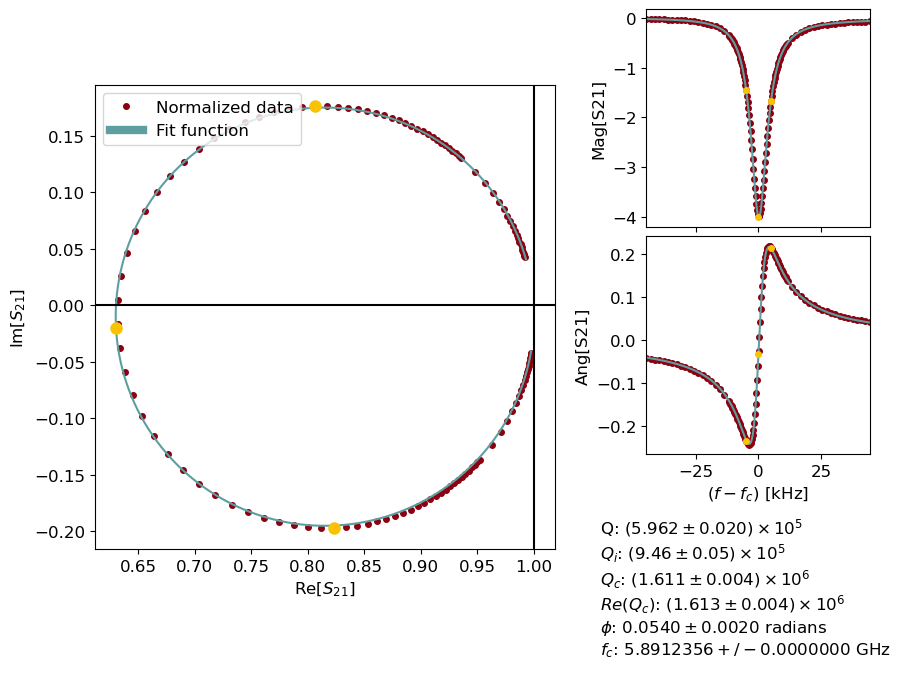

-36.020599913279625


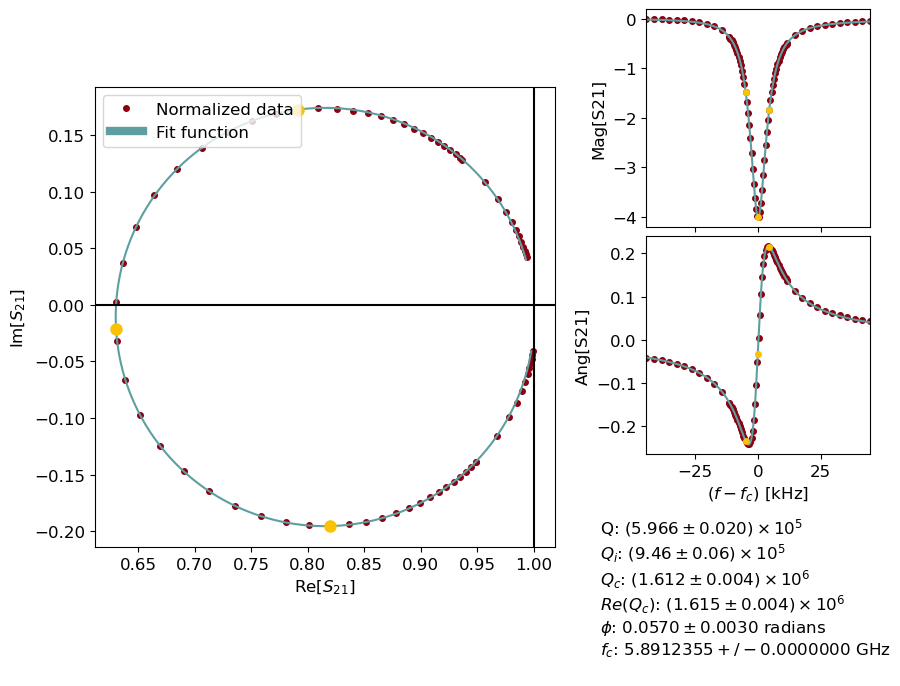

-42.04119982655925


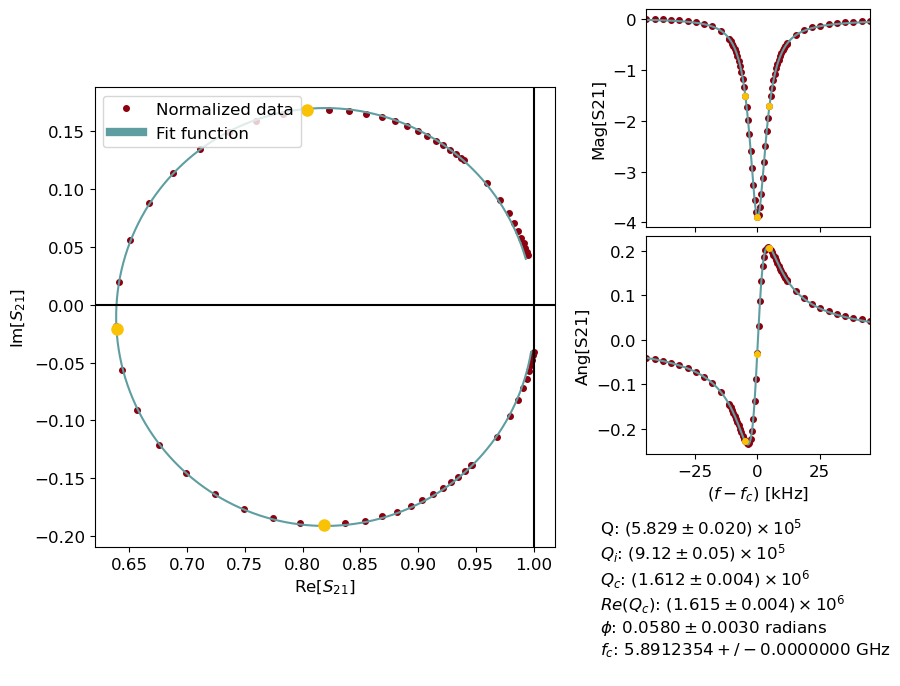

-48.061799739838875


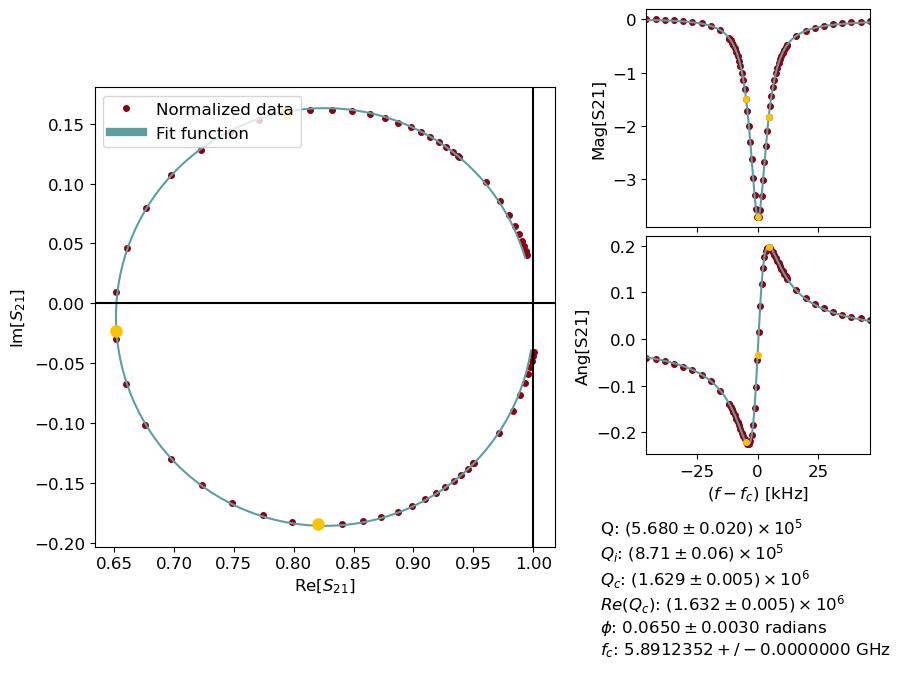

-54.0823996531185


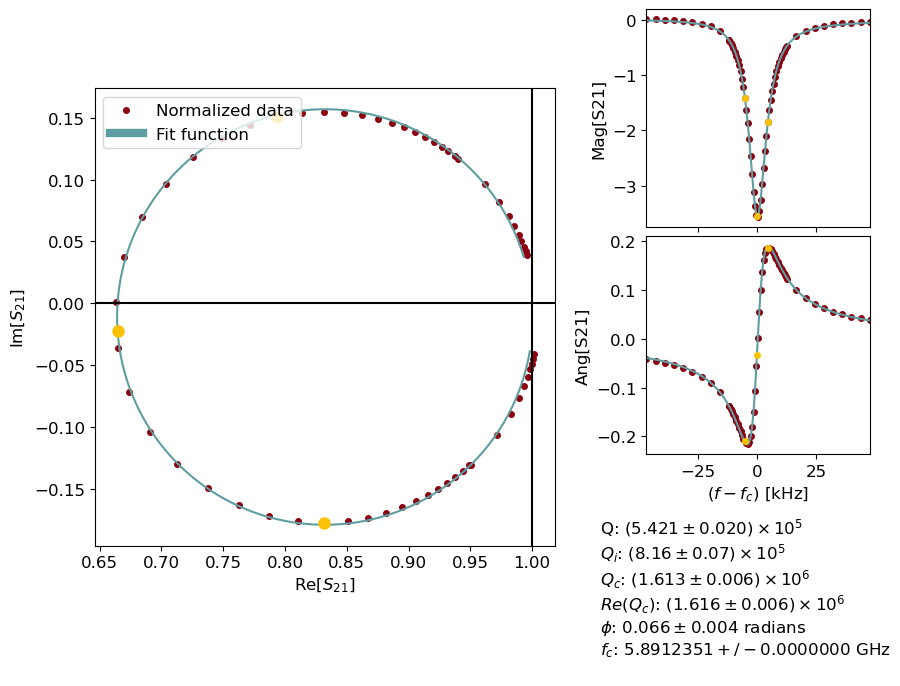

-60.102999566398125


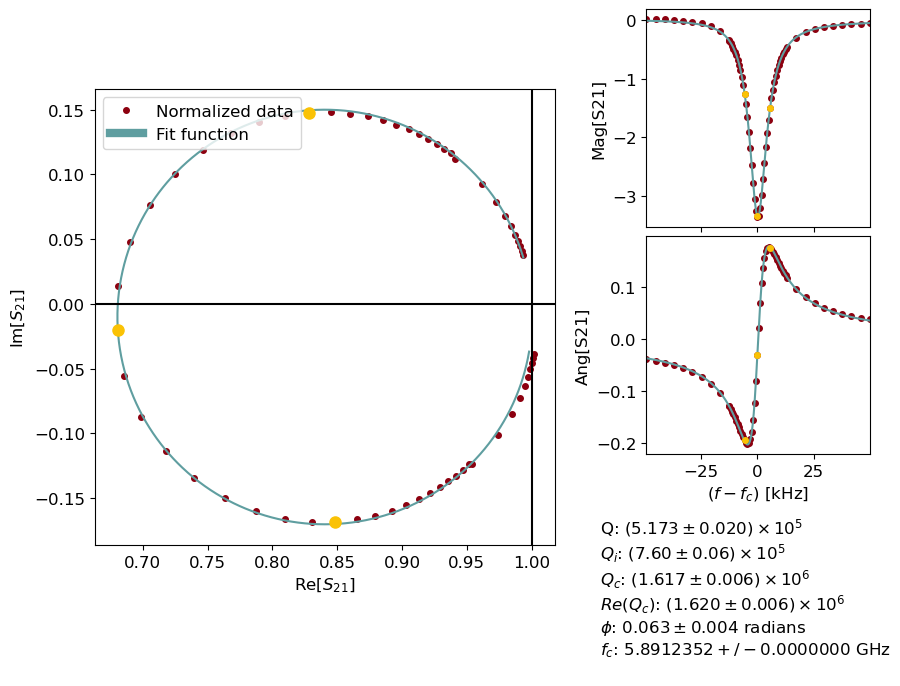

-66.12359947967775


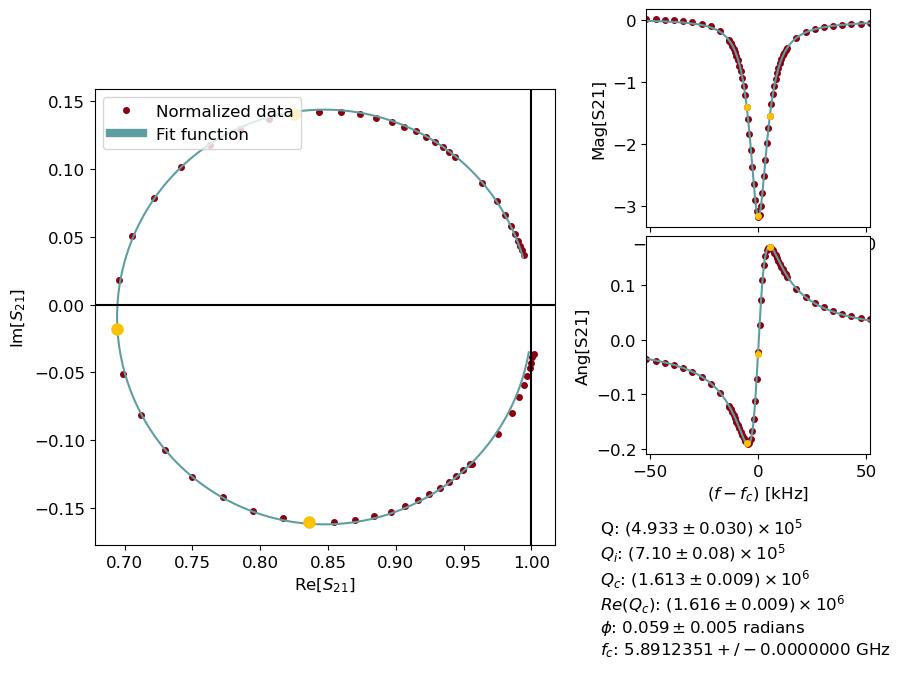

-72.14419939295738


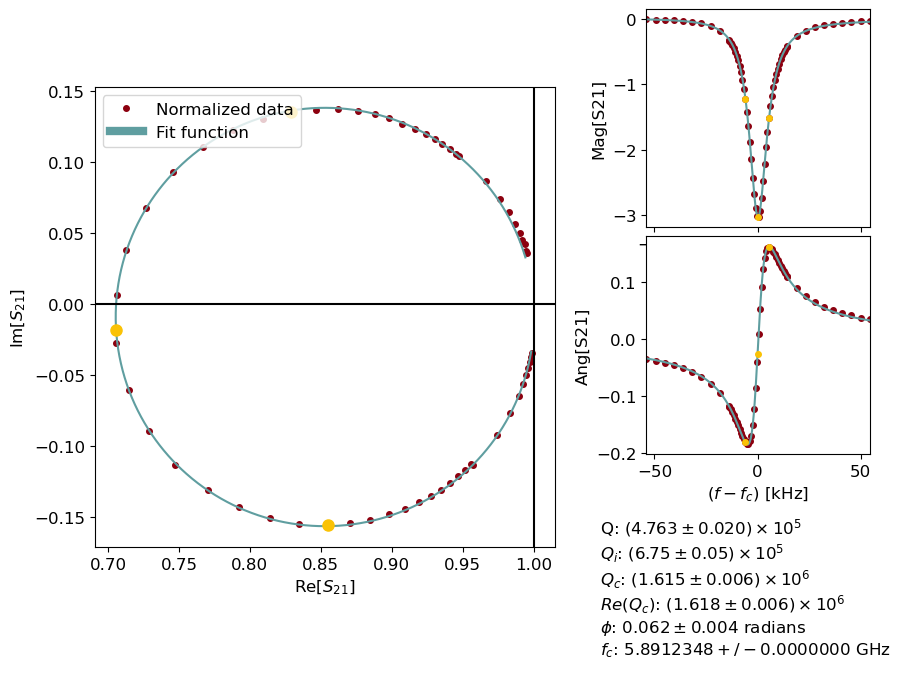

-78.164799306237


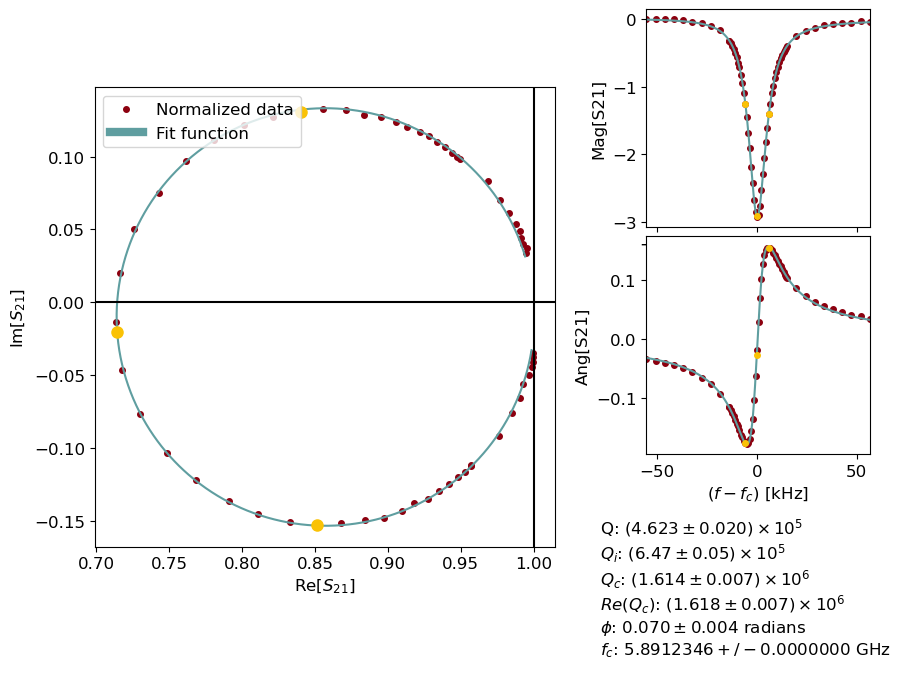

-84.18539921951663


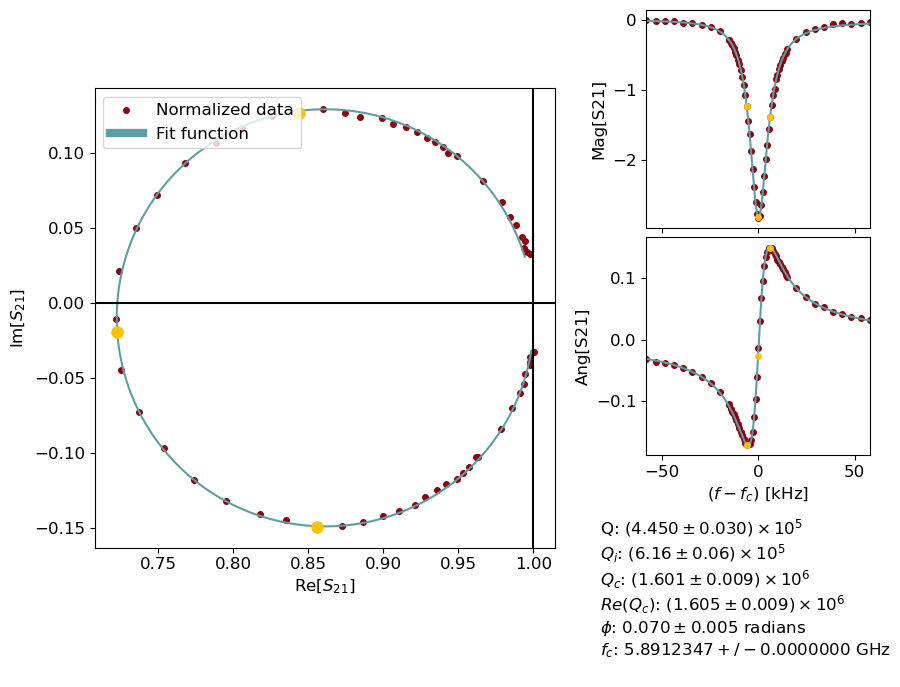

-90.20599913279625


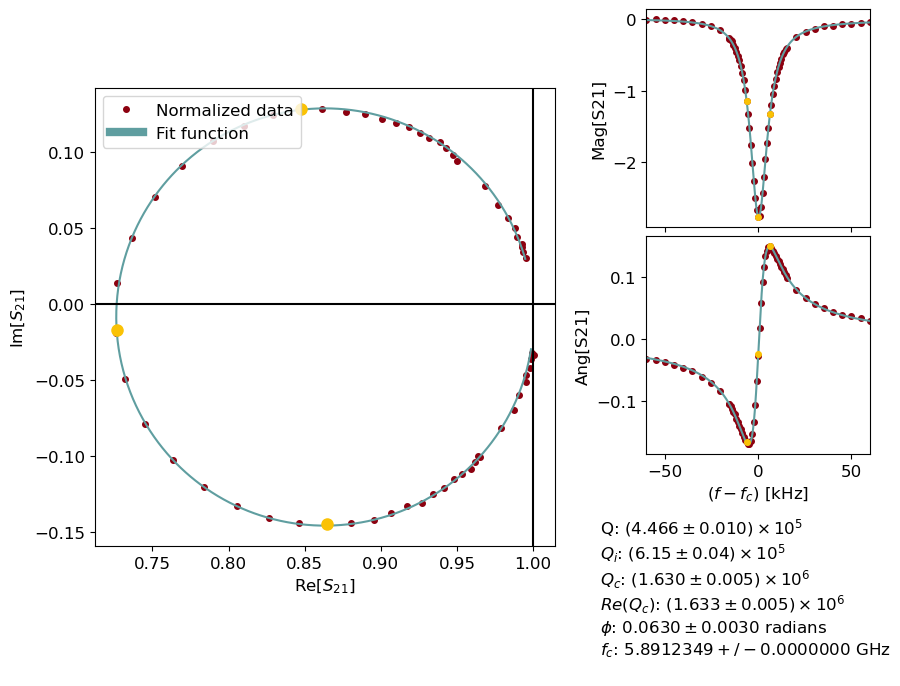

Time elapsed:  23.00530219078064
-30.0


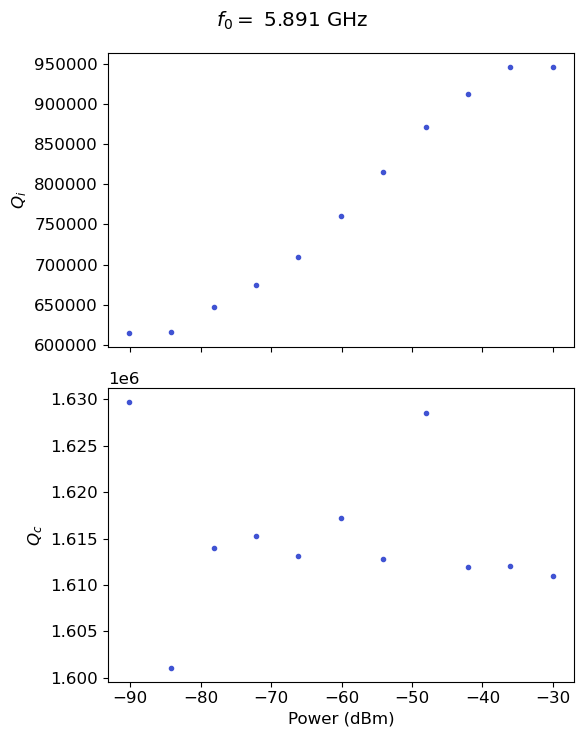

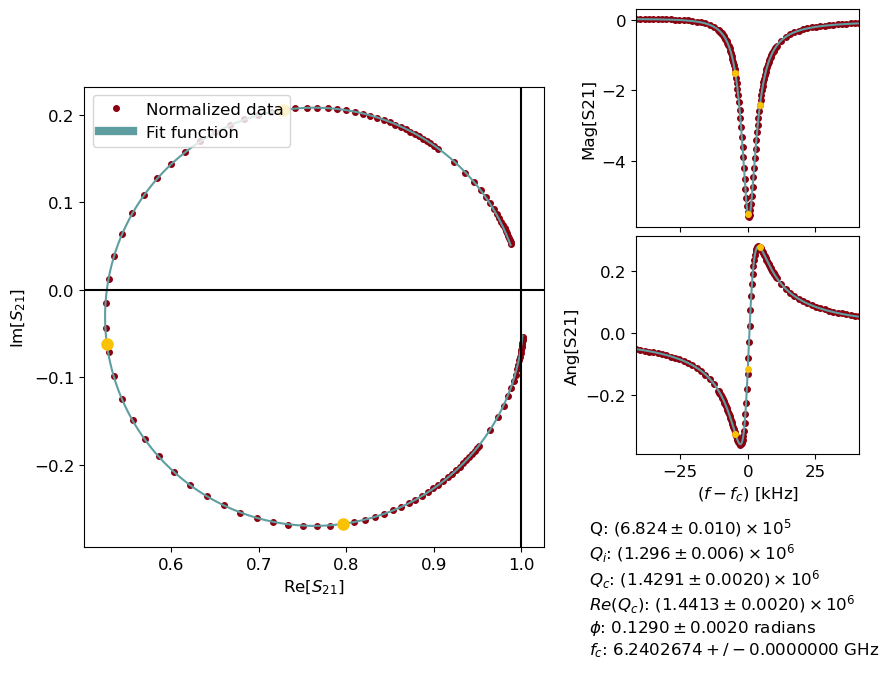

-36.020599913279625


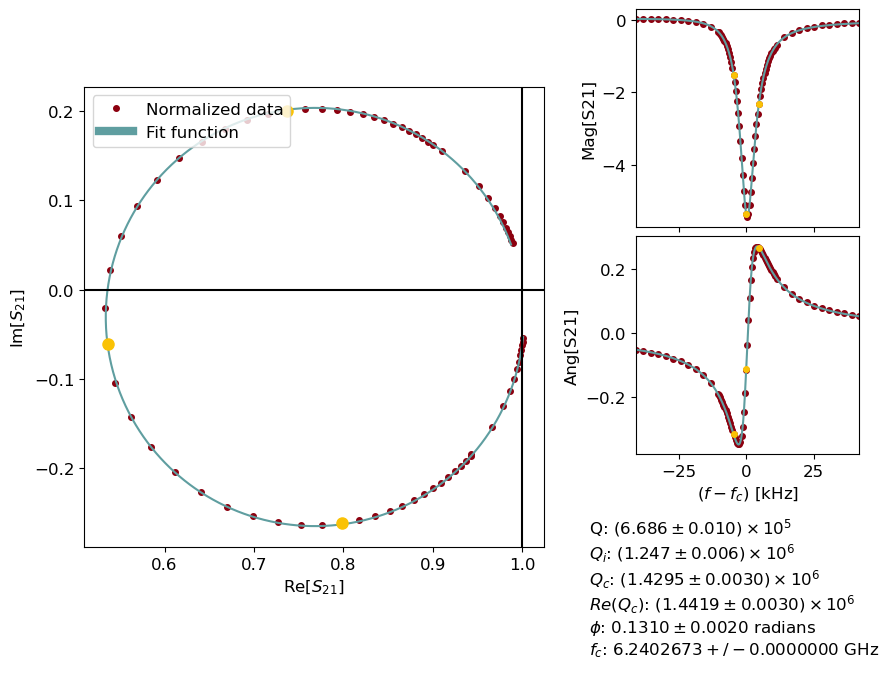

-42.04119982655925


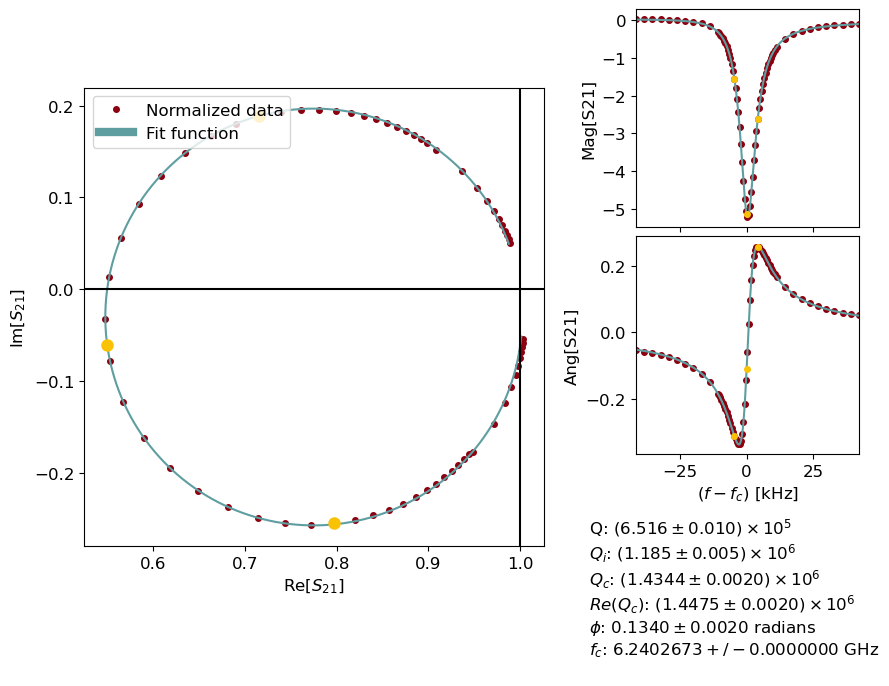

-48.061799739838875


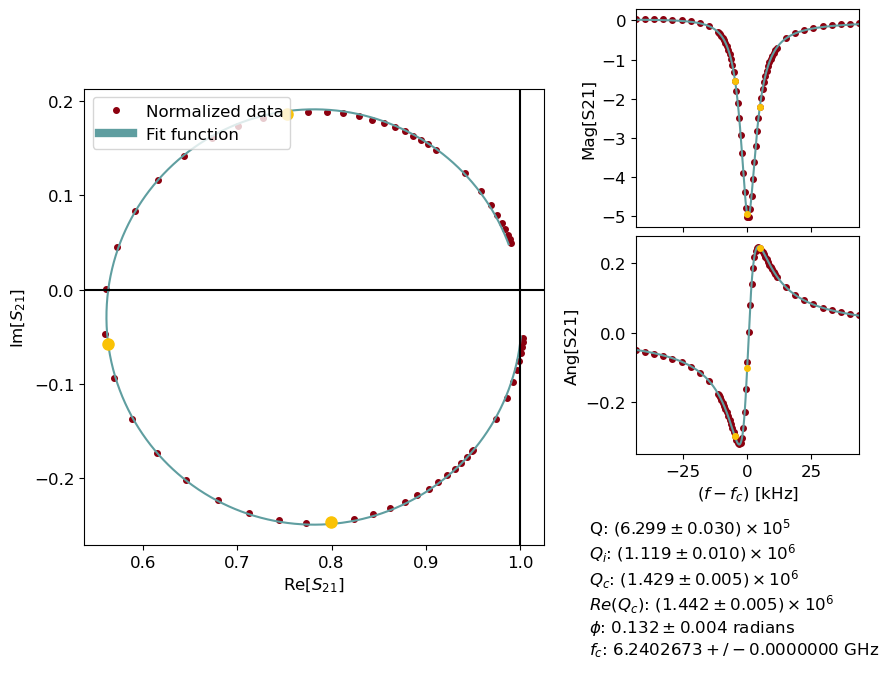

-54.0823996531185


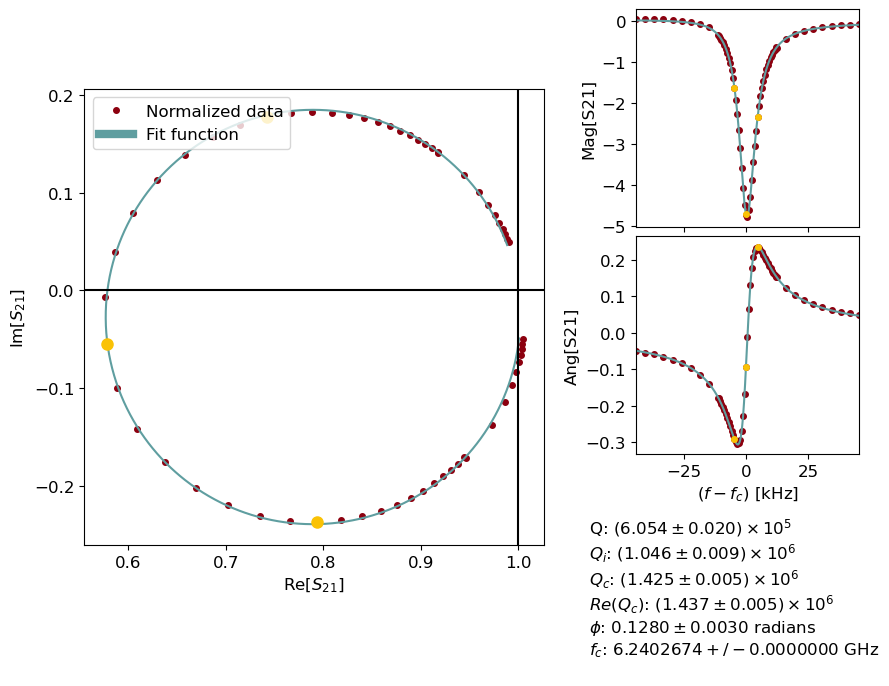

-60.102999566398125


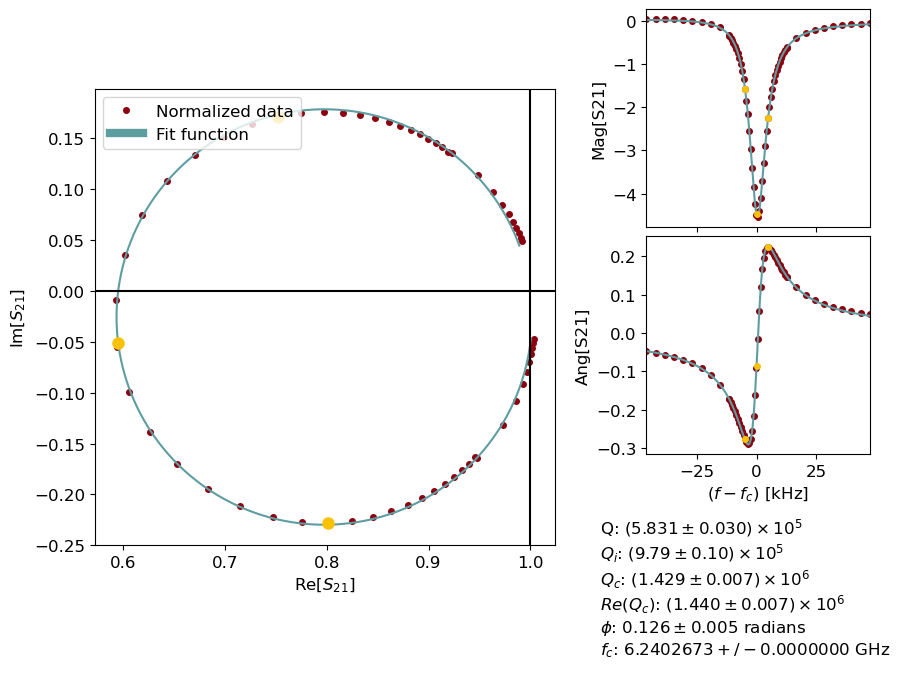

-66.12359947967775


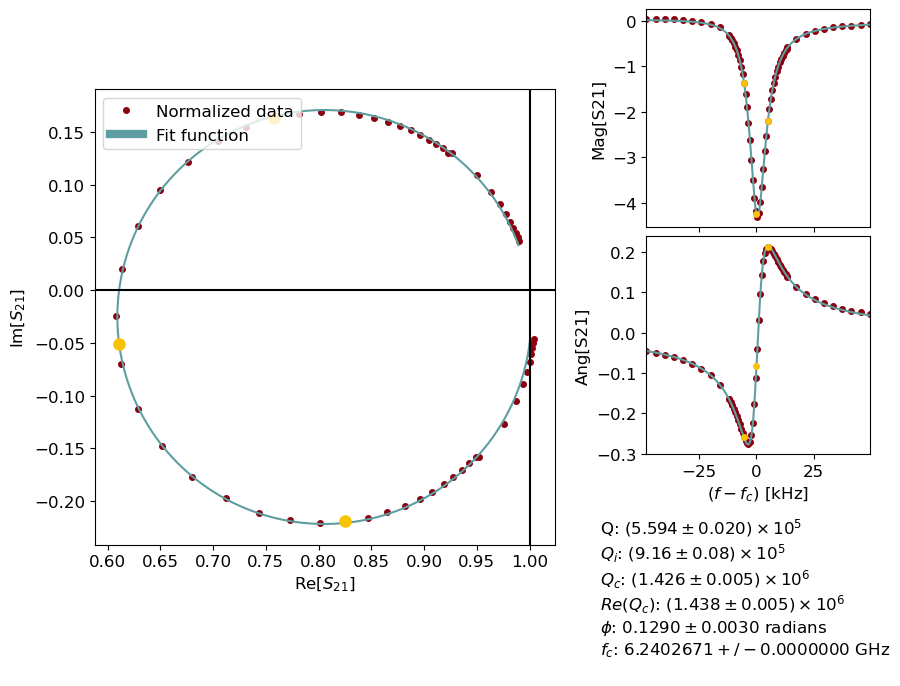

-72.14419939295738


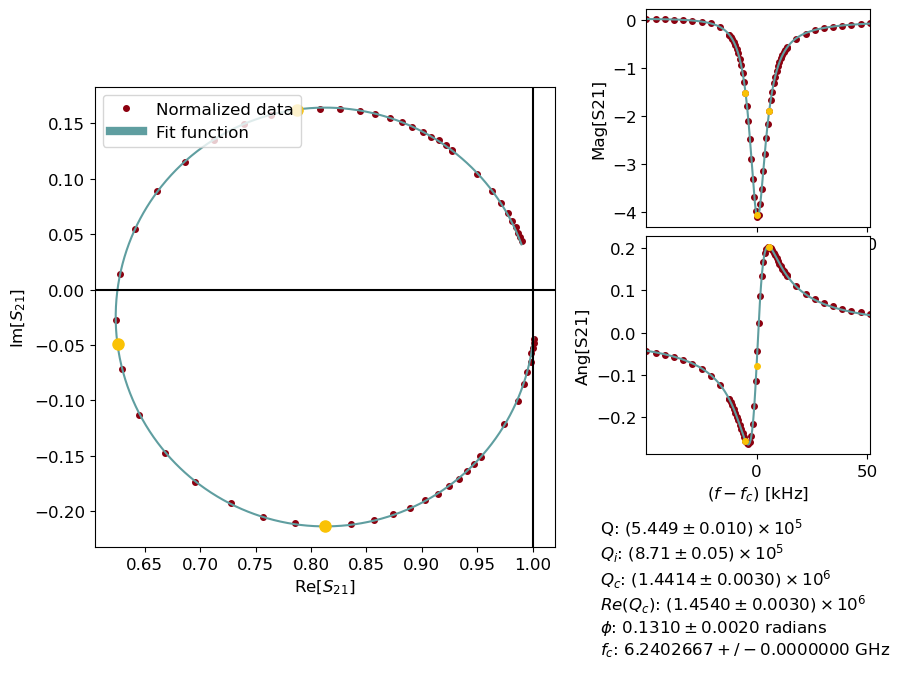

-78.164799306237


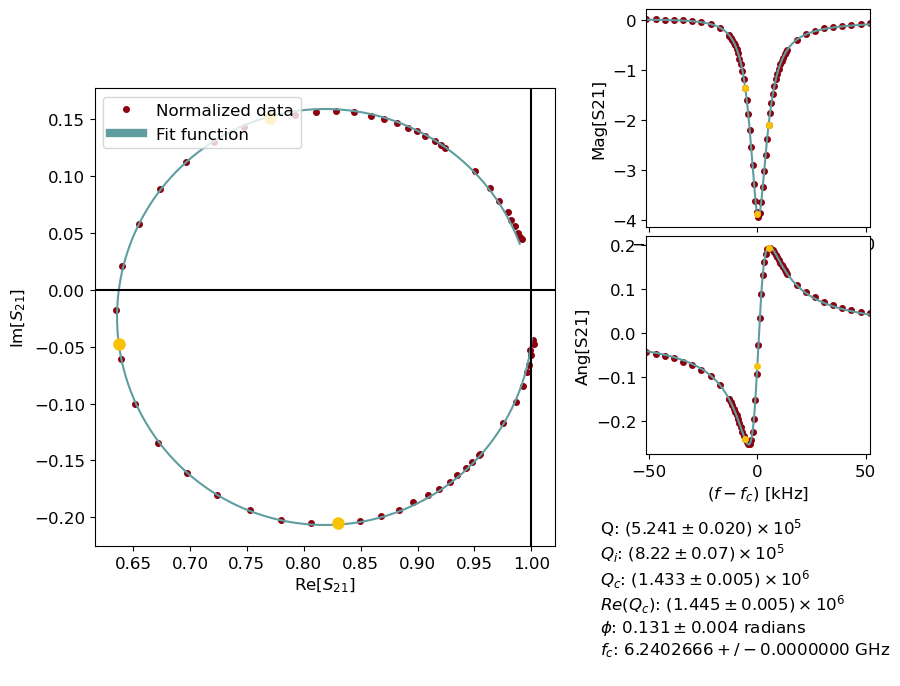

-84.18539921951663


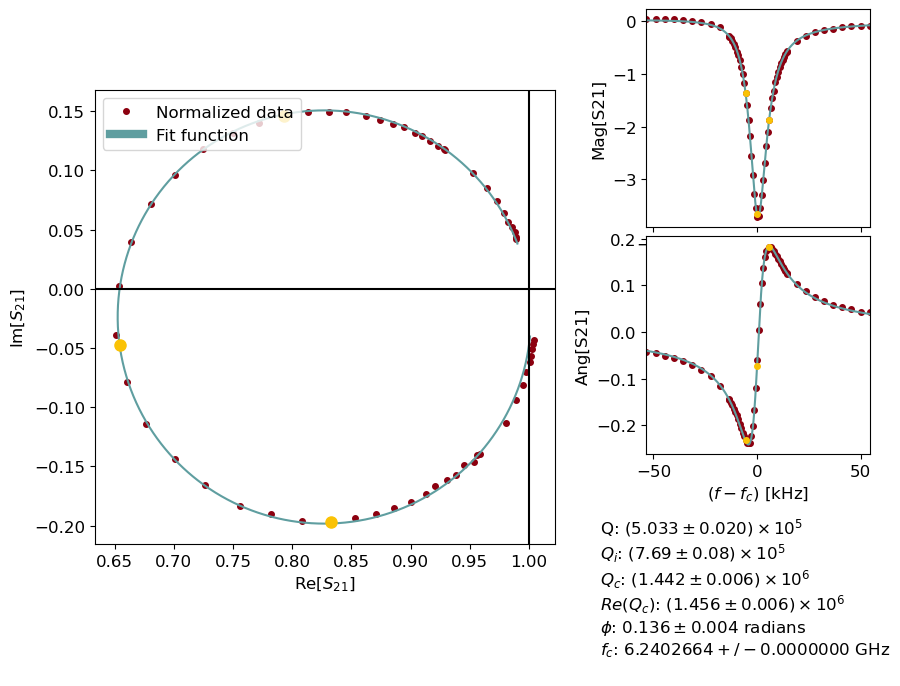

-90.20599913279625


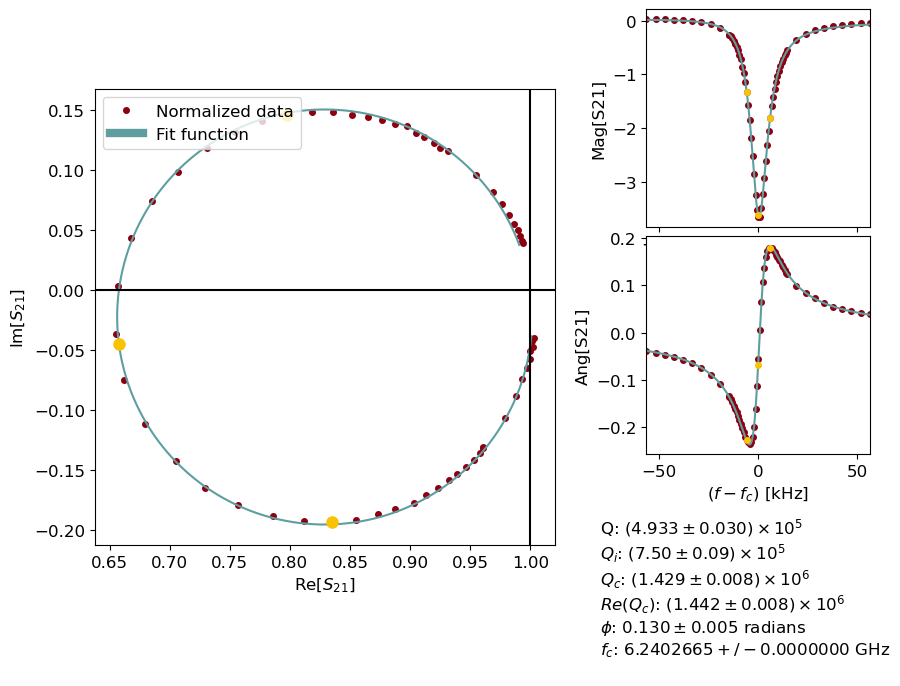

Time elapsed:  42.9716260433197
-30.0


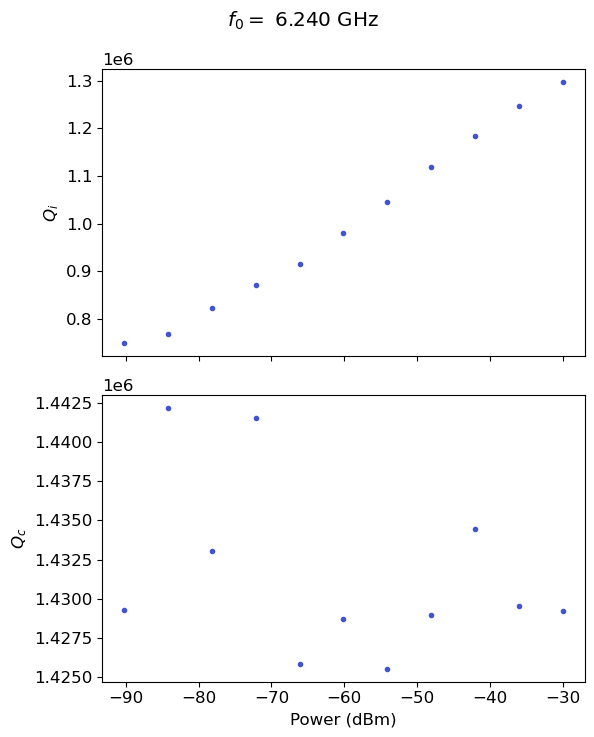

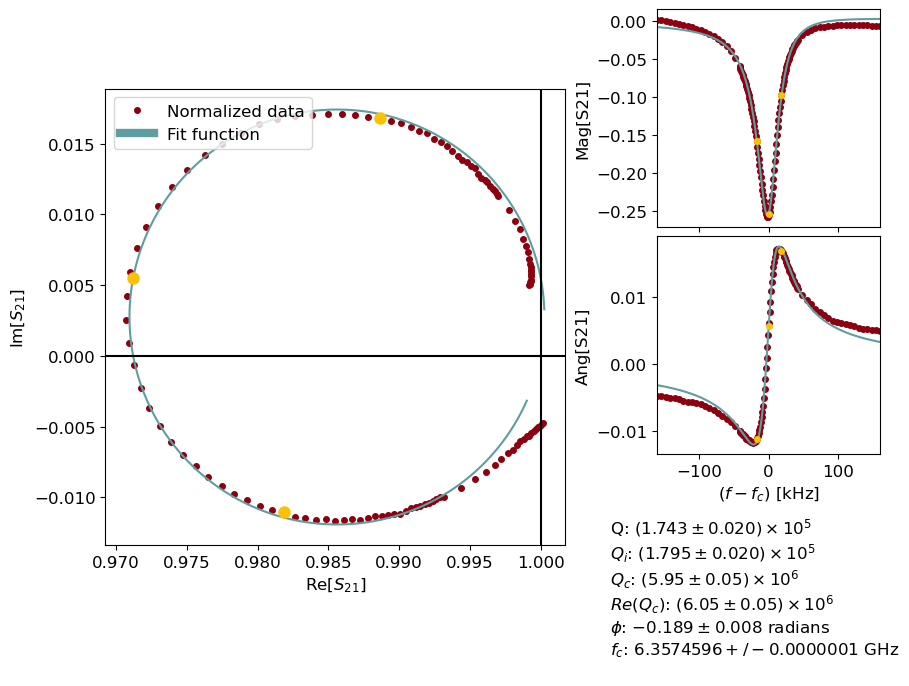

-36.020599913279625


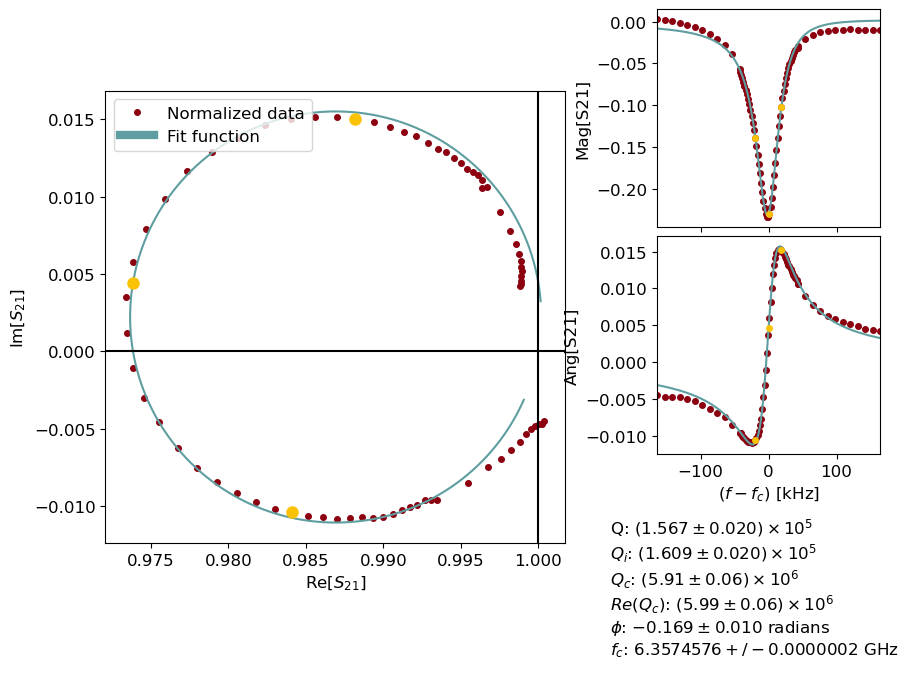

-42.04119982655925


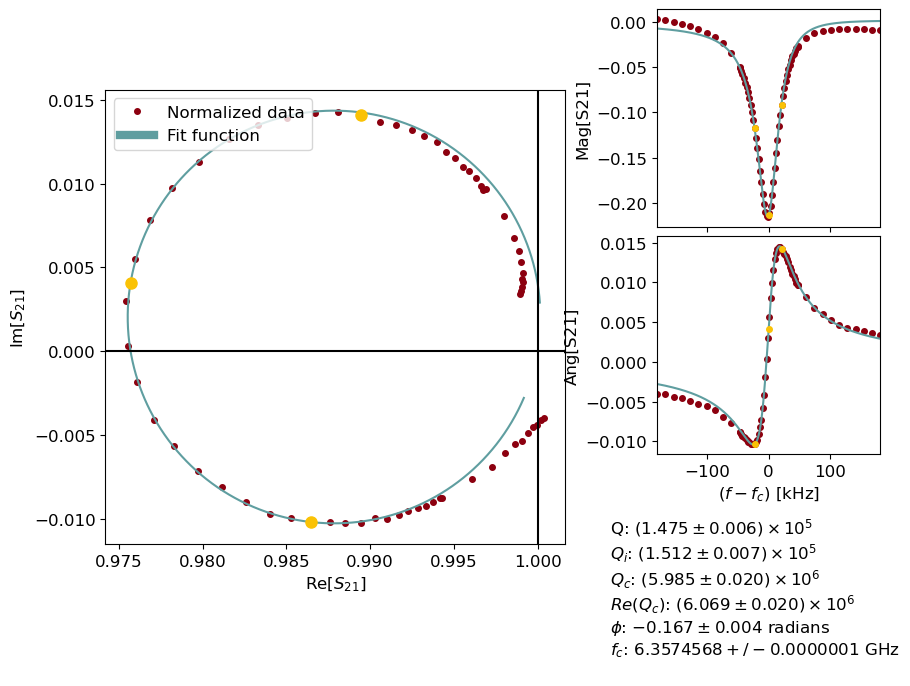

-48.061799739838875


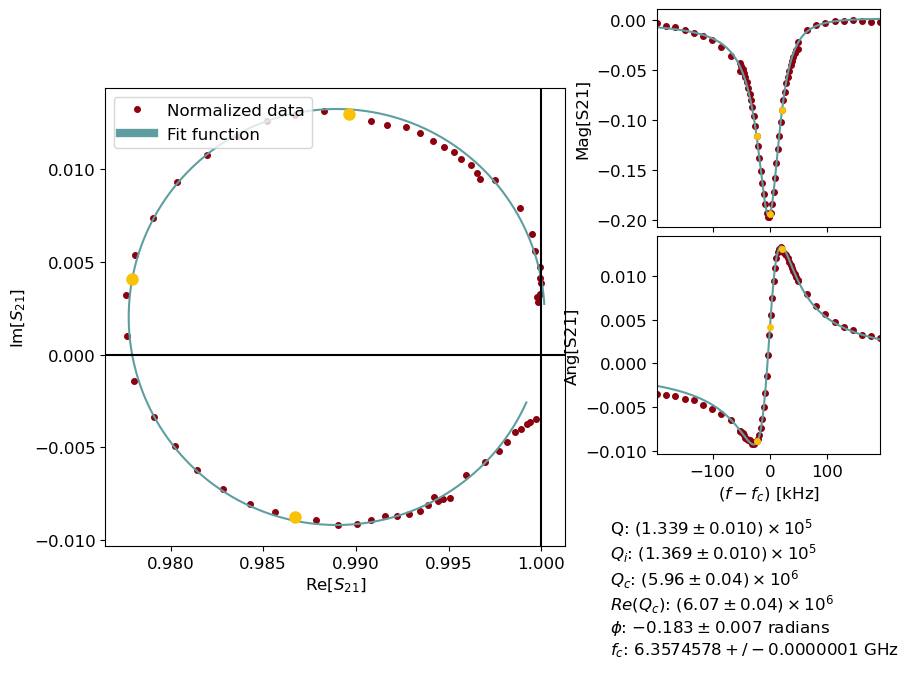

-54.0823996531185


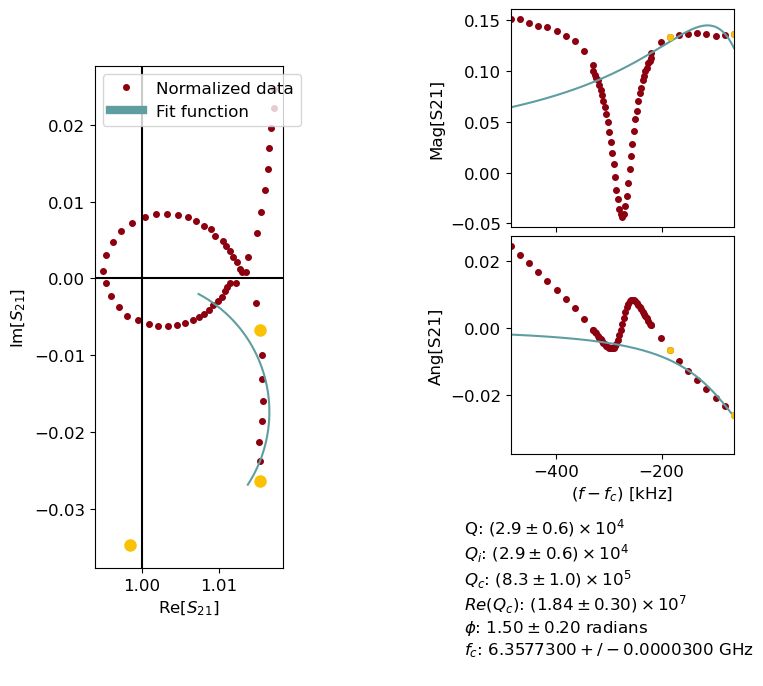

-60.102999566398125


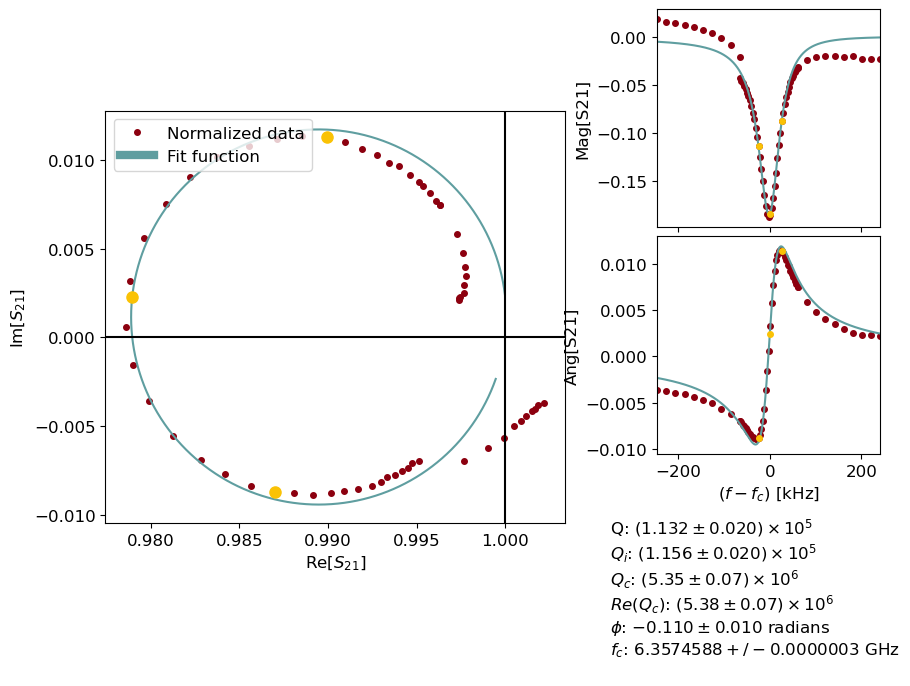

-66.12359947967775
attempt to get argmin of an empty sequence
>Failed to find initial guess for method DCM.  Please manually initialize a guess
An exception occurred: cannot access local variable 'init_guess' where it is not associated with a value
-72.14419939295738
attempt to get argmin of an empty sequence
>Failed to find initial guess for method DCM.  Please manually initialize a guess
An exception occurred: cannot access local variable 'init_guess' where it is not associated with a value
-78.164799306237
attempt to get argmin of an empty sequence
>Failed to find initial guess for method DCM.  Please manually initialize a guess
An exception occurred: cannot access local variable 'init_guess' where it is not associated with a value
-84.18539921951663
attempt to get argmin of an empty sequence
>Failed to find initial guess for method DCM.  Please manually initialize a guess
An exception occurred: cannot access local variable 'init_guess' where it is not associated with a value
-90.20

Time elapsed:  55.2627649307251
-30.0
attempt to get argmin of an empty sequence
>Failed to find initial guess for method DCM.  Please manually initialize a guess
An exception occurred: cannot access local variable 'init_guess' where it is not associated with a value
-36.020599913279625


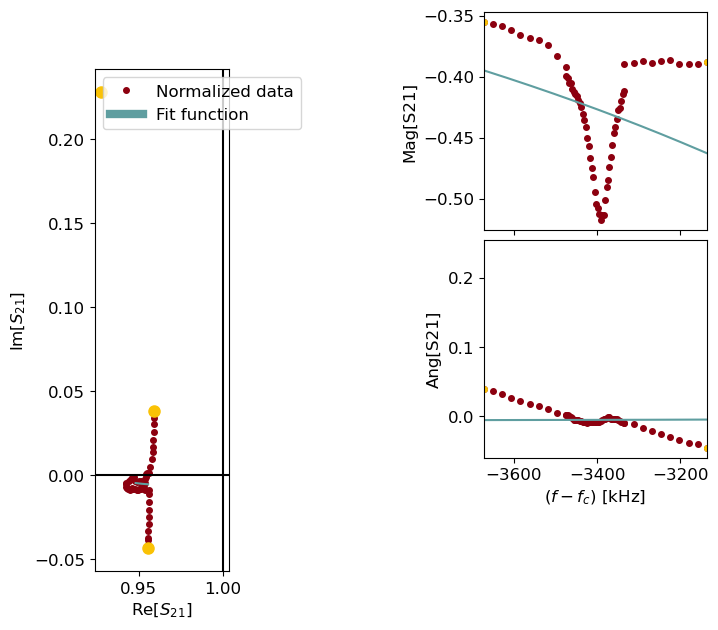

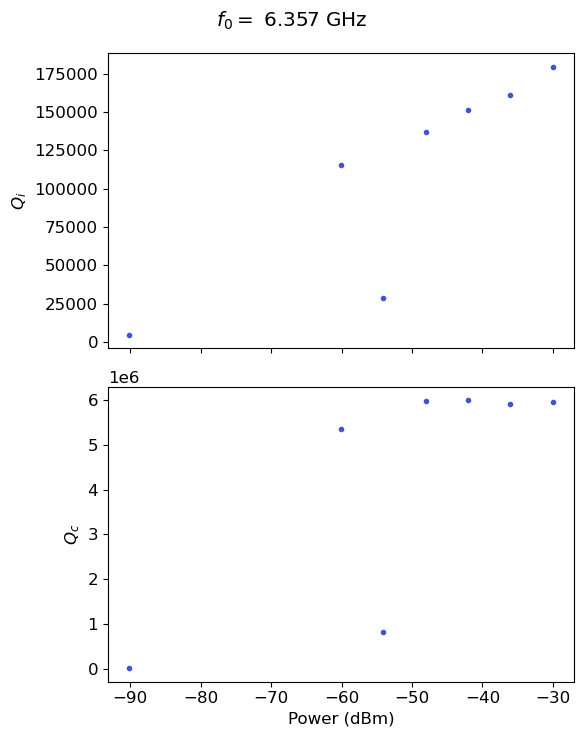

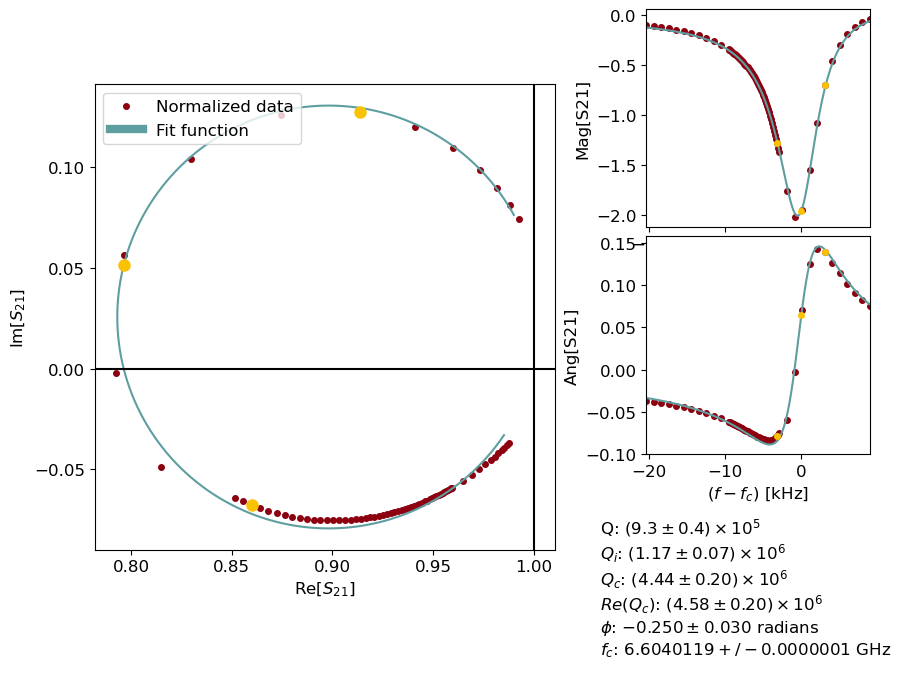

-42.04119982655925


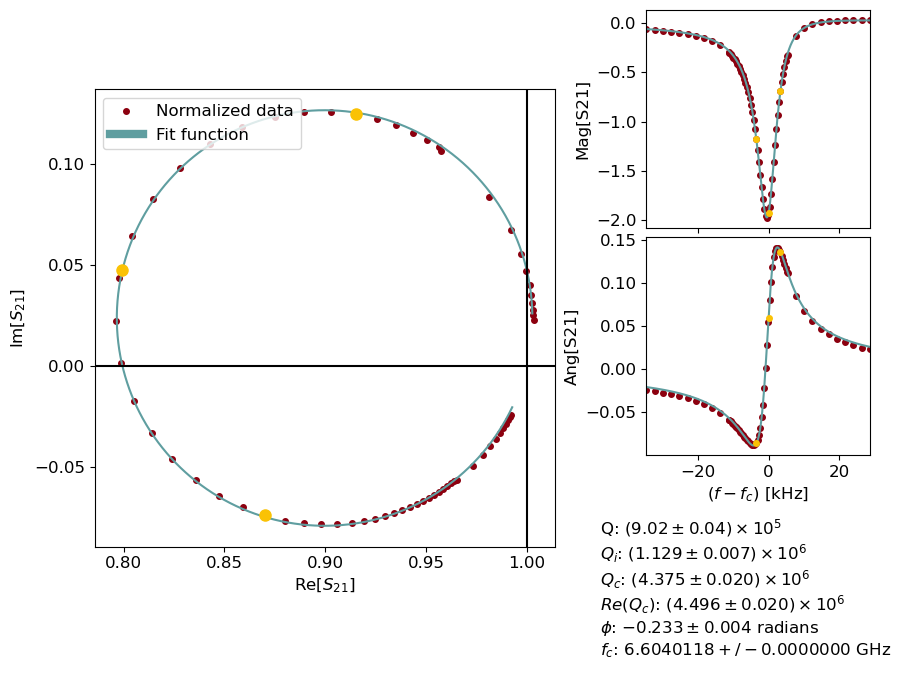

-48.061799739838875


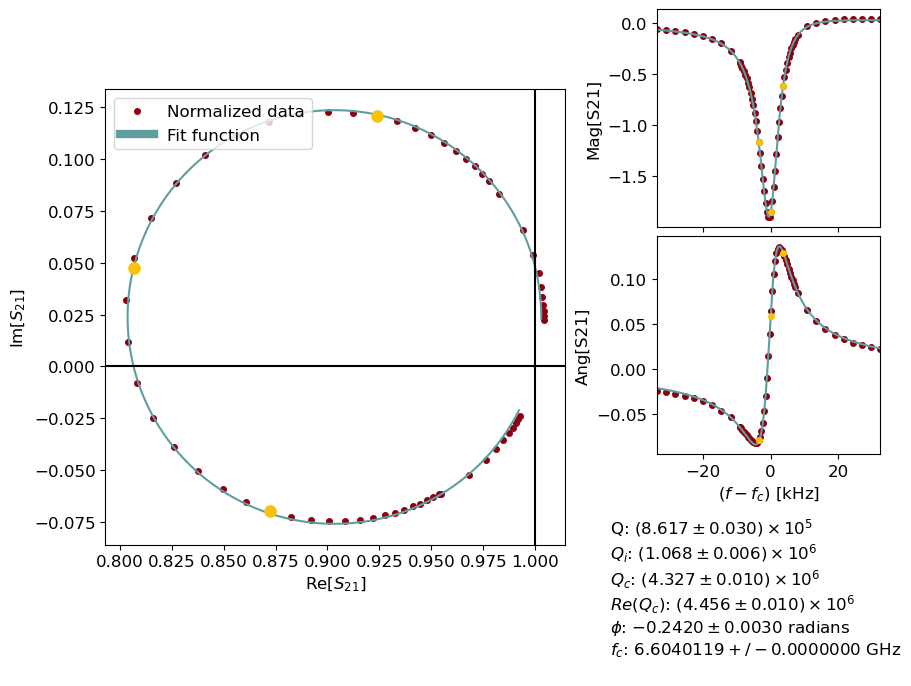

-54.0823996531185


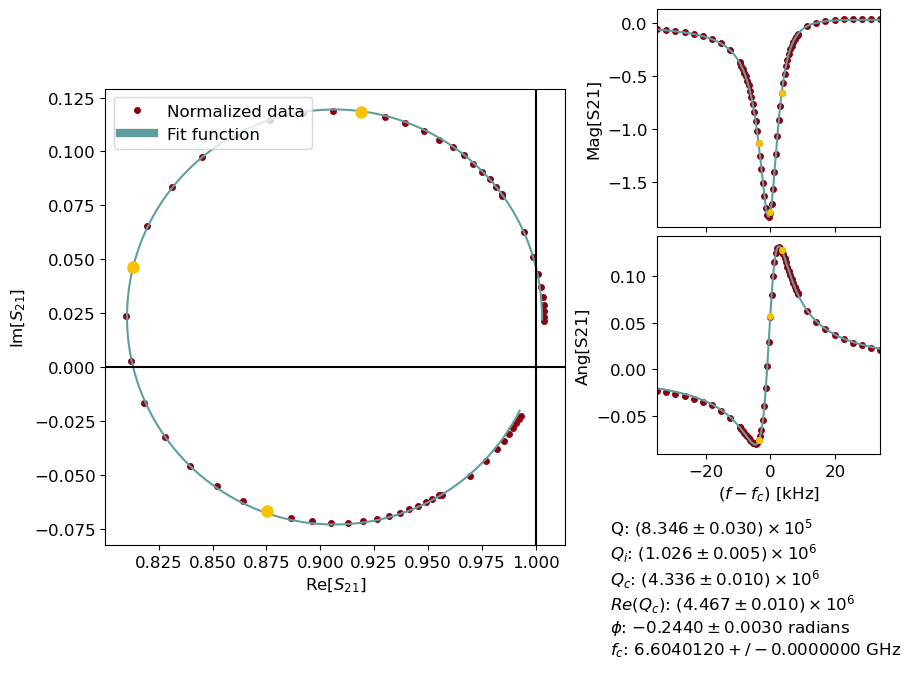

-60.102999566398125


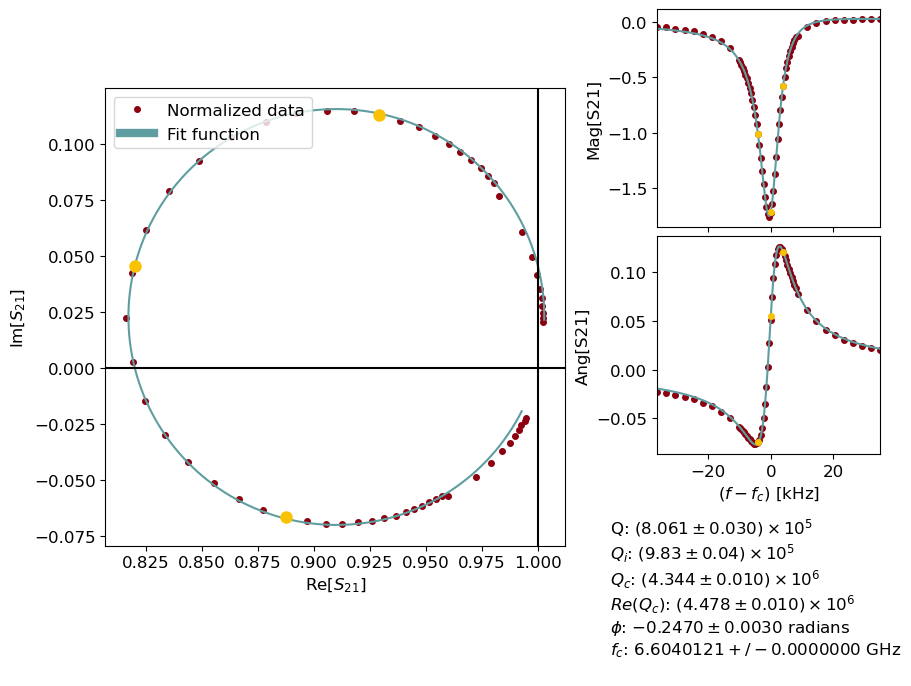

-66.12359947967775


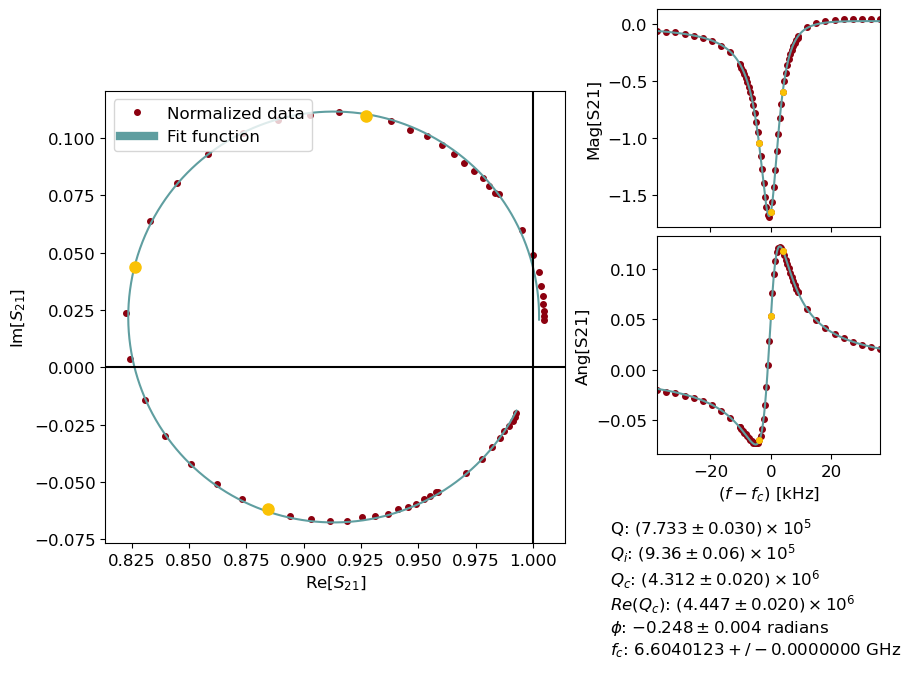

-72.14419939295738


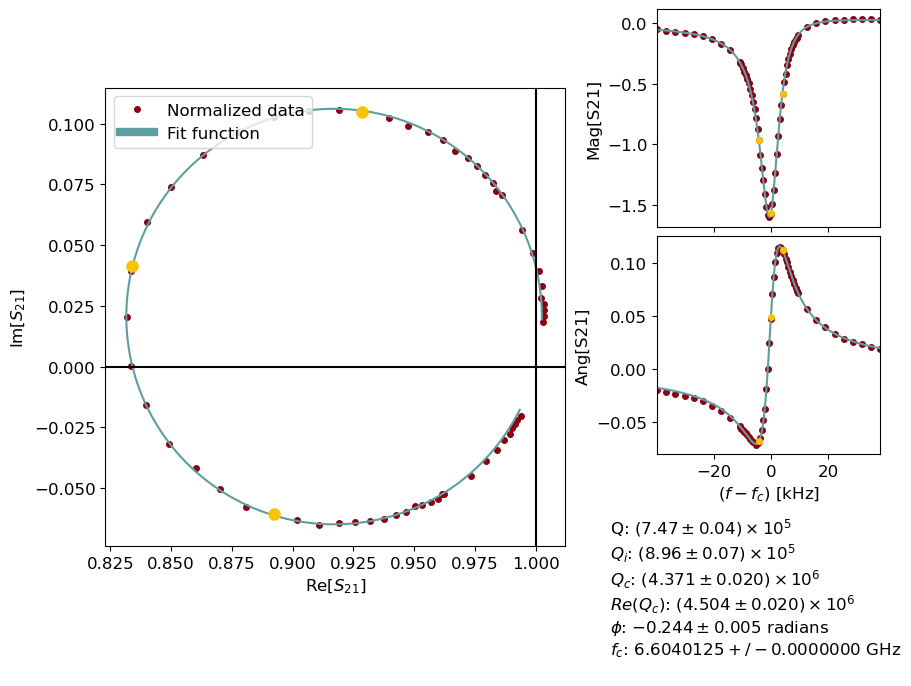

-78.164799306237


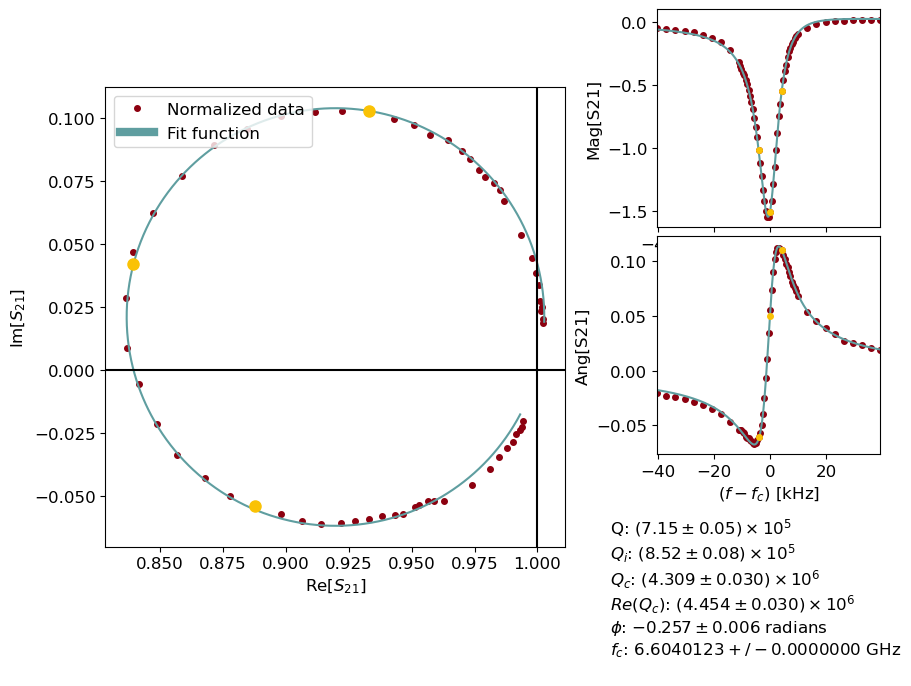

-84.18539921951663


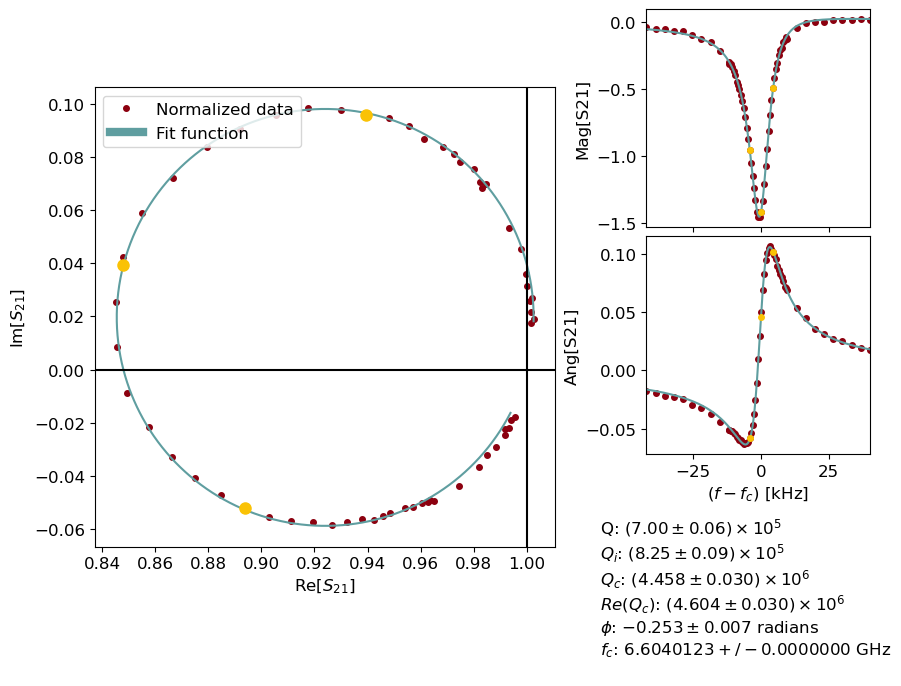

-90.20599913279625


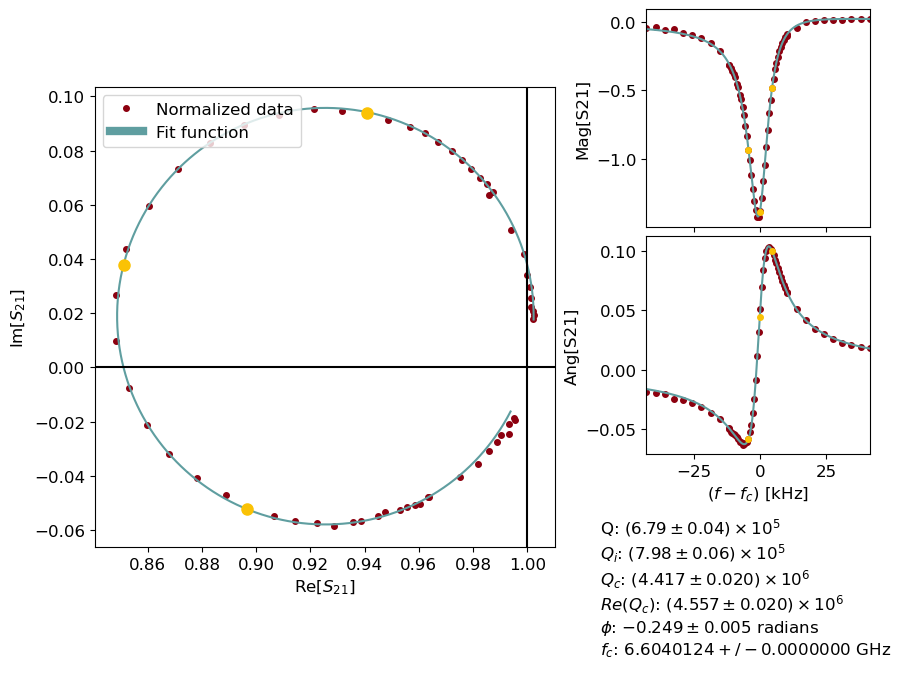

Time elapsed:  72.73216891288757
-30.0


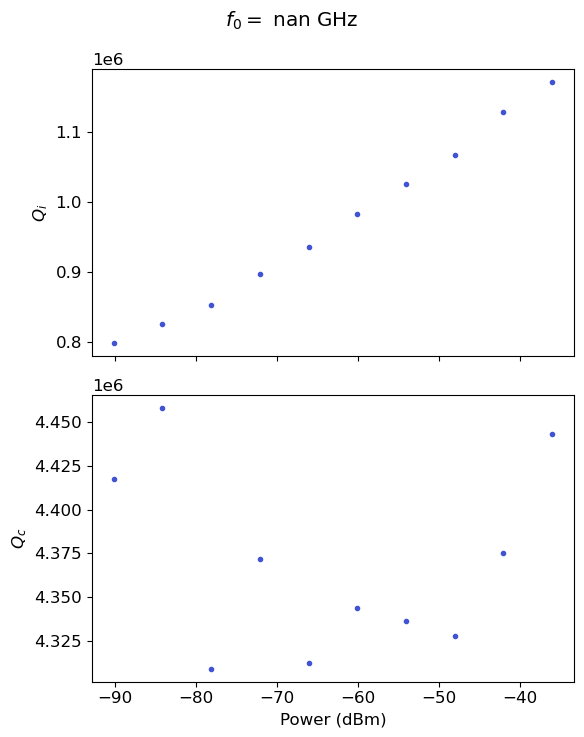

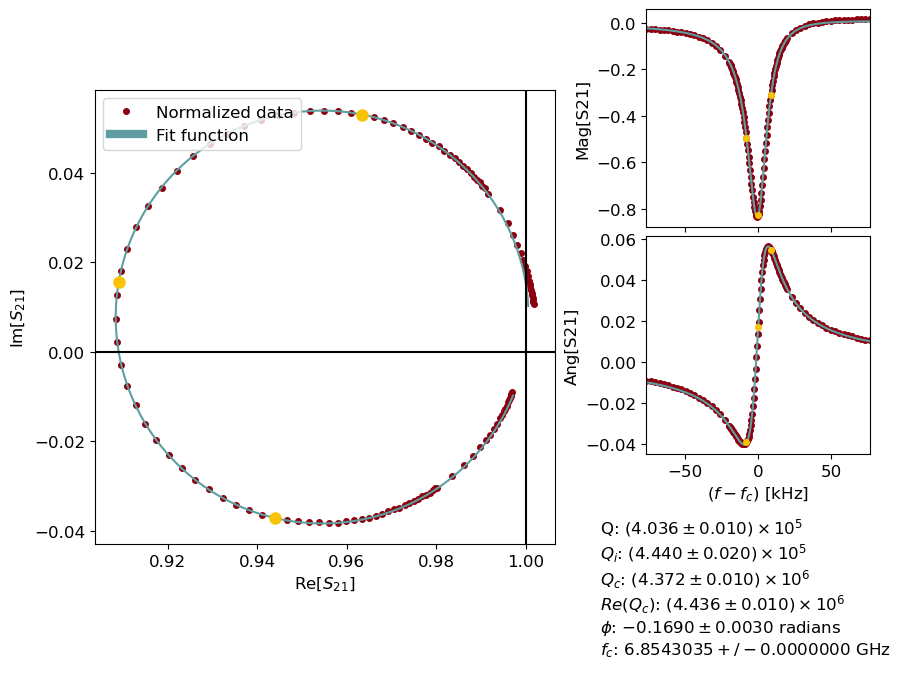

-36.020599913279625


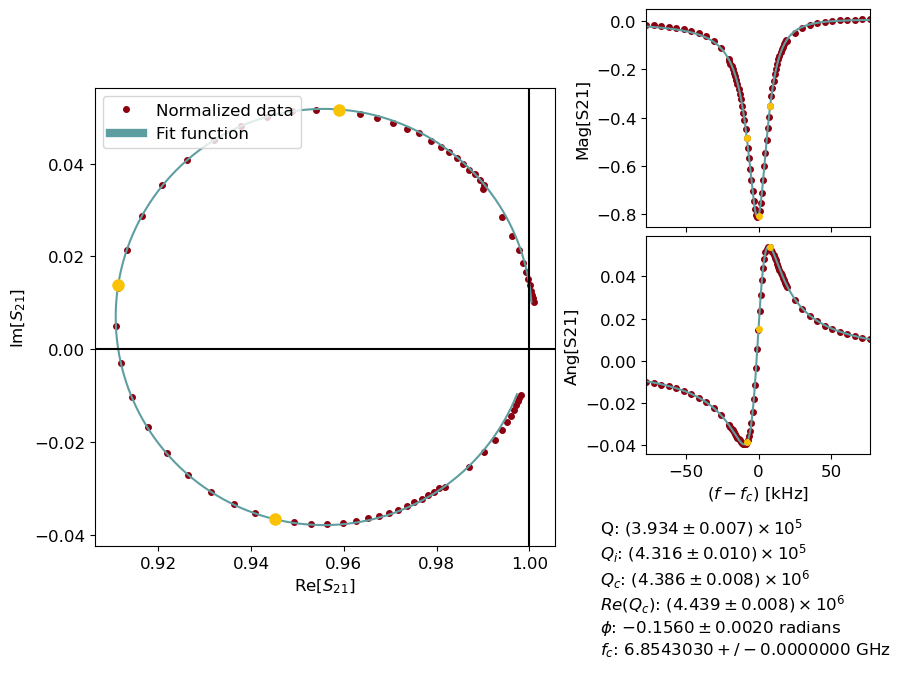

-42.04119982655925


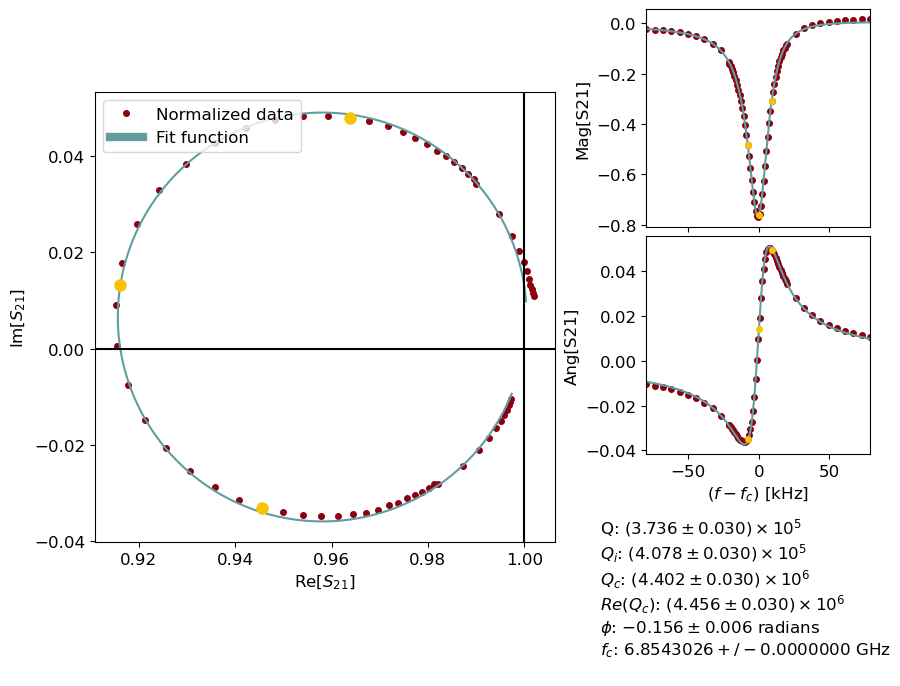

-48.061799739838875


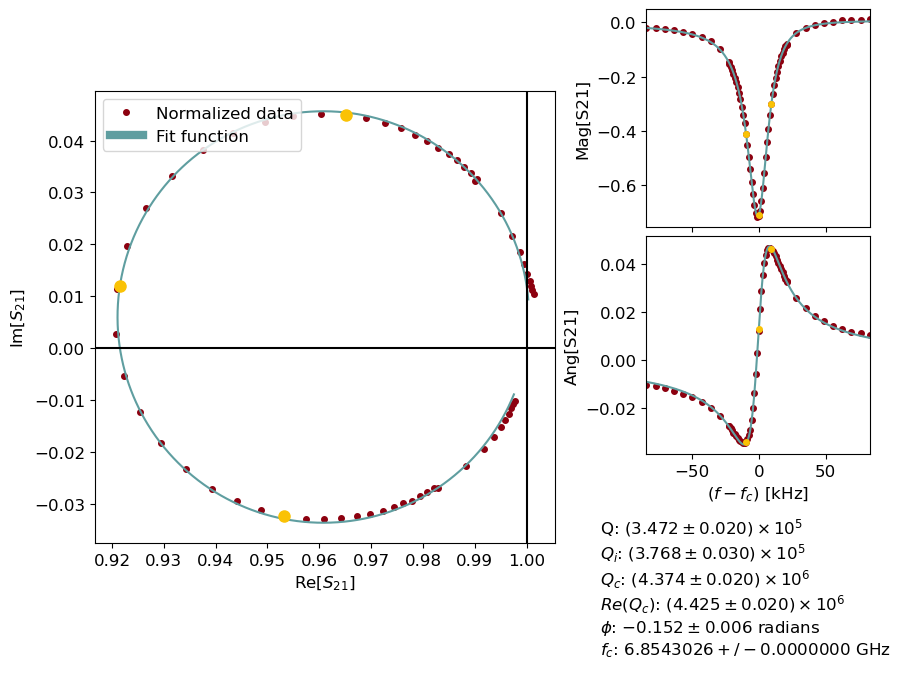

-54.0823996531185


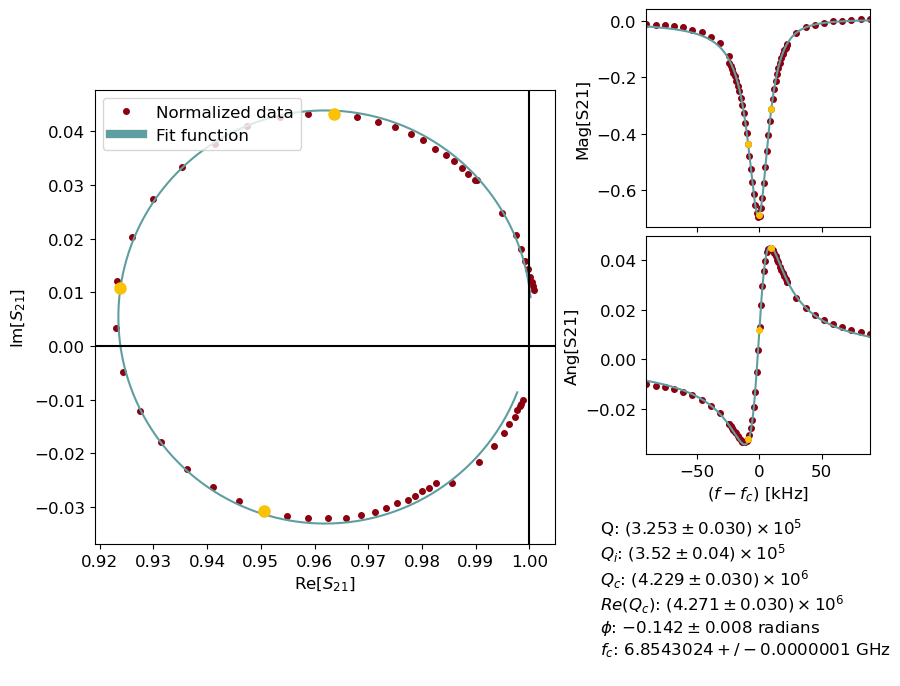

-60.102999566398125


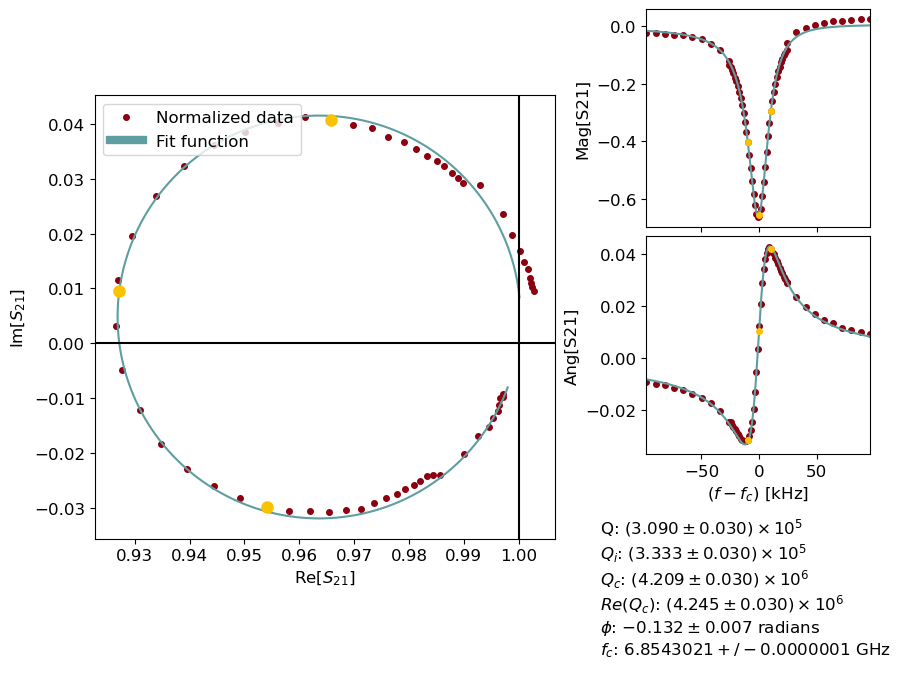

-66.12359947967775


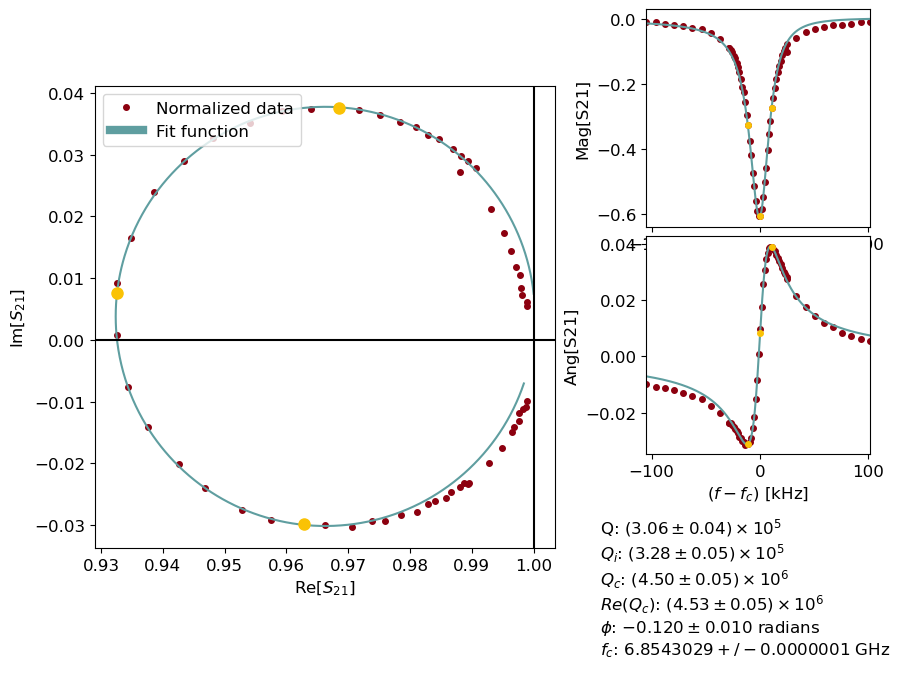

-72.14419939295738


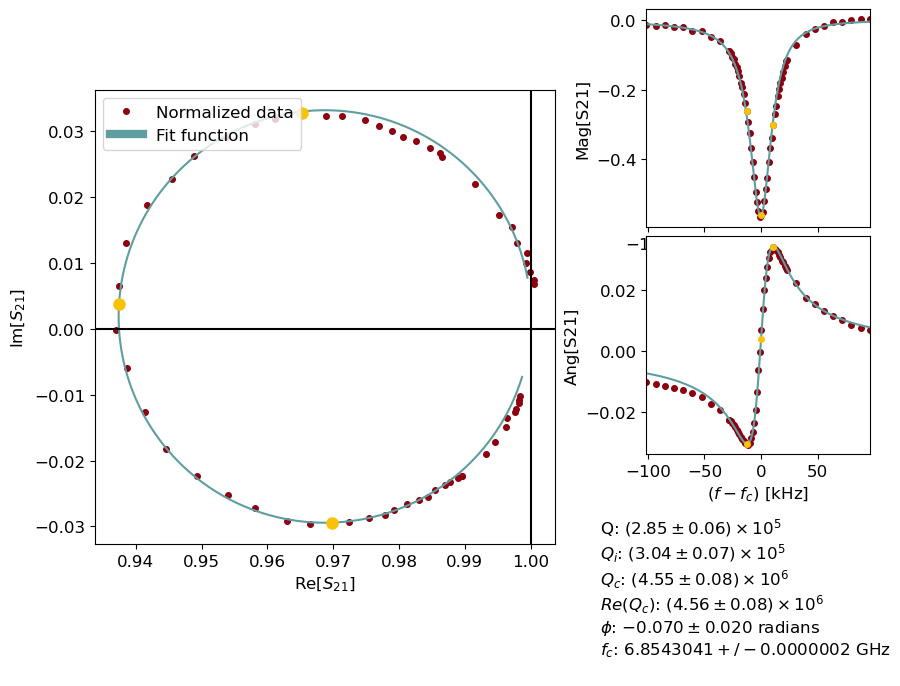

-78.164799306237


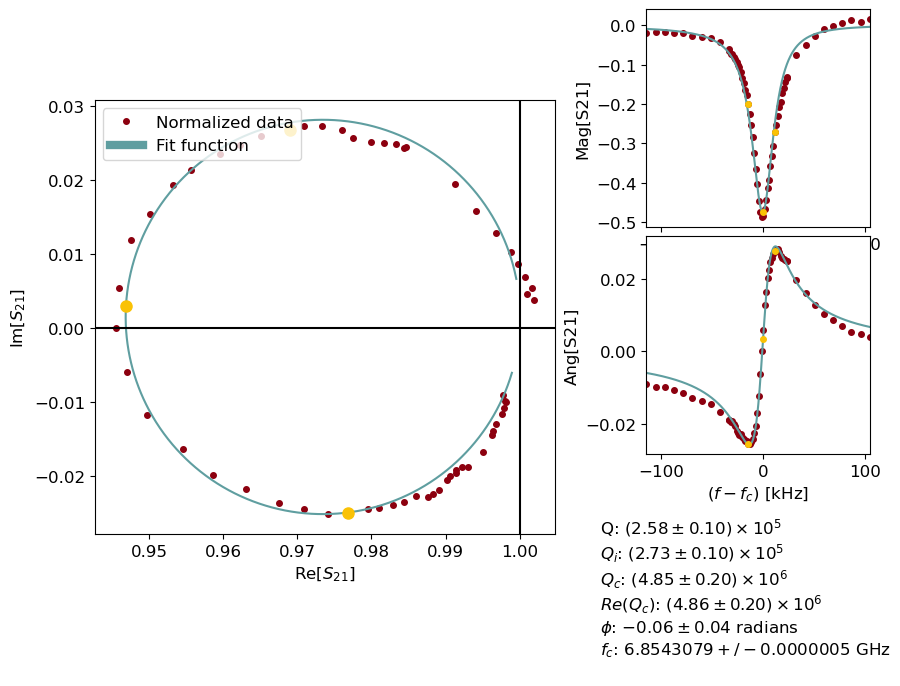

-84.18539921951663


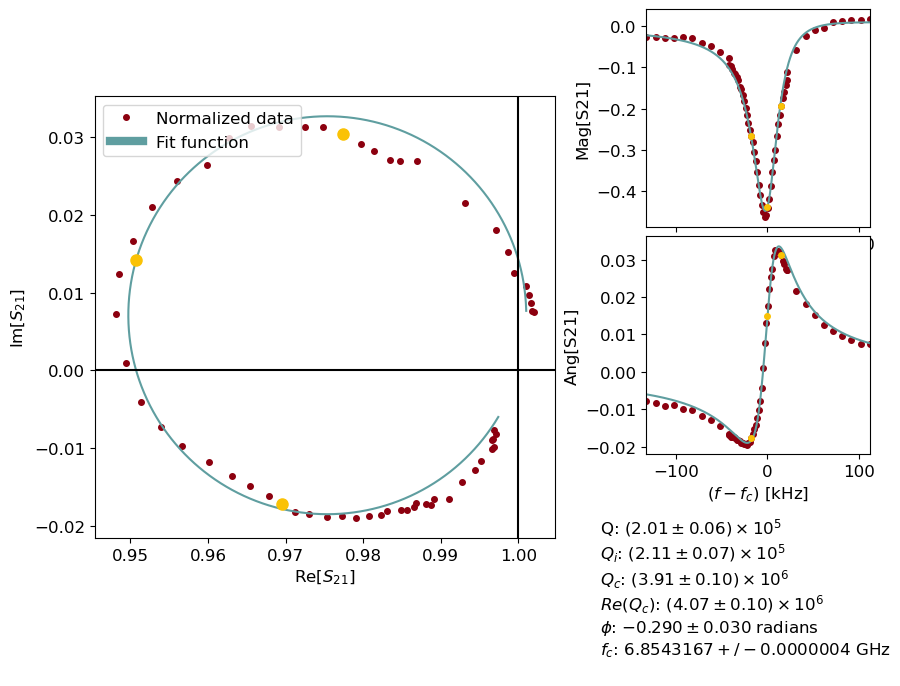

-90.20599913279625


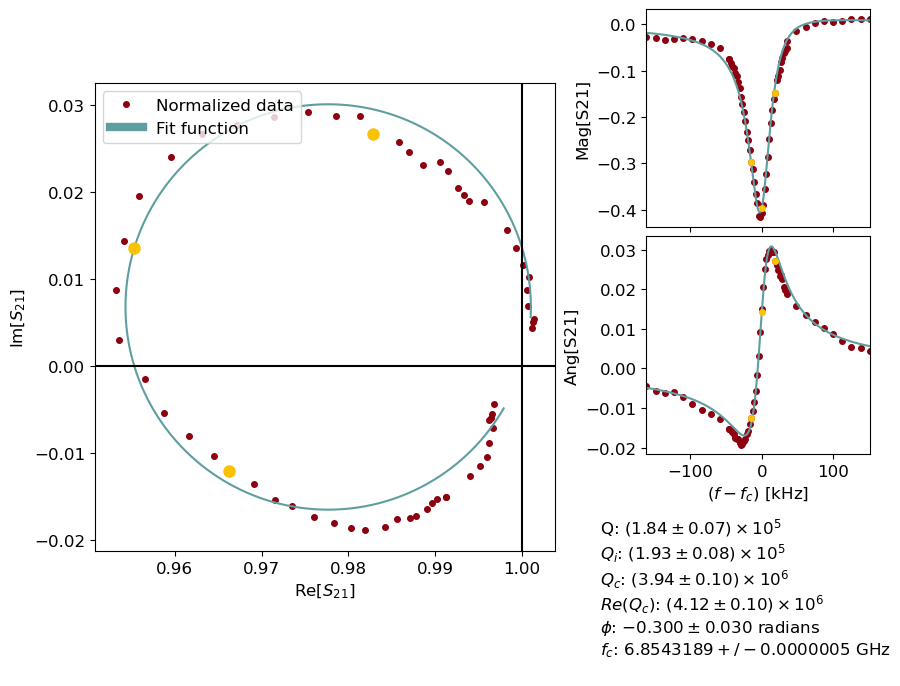

Time elapsed:  92.38197803497314
-30.0


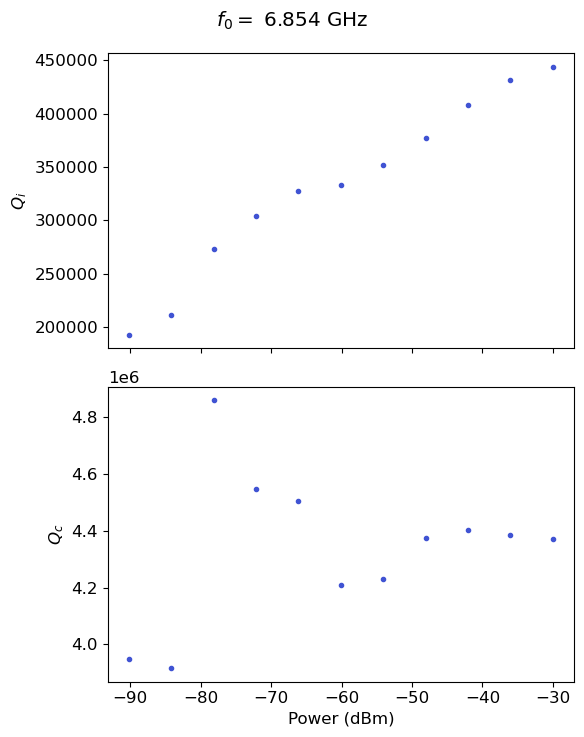

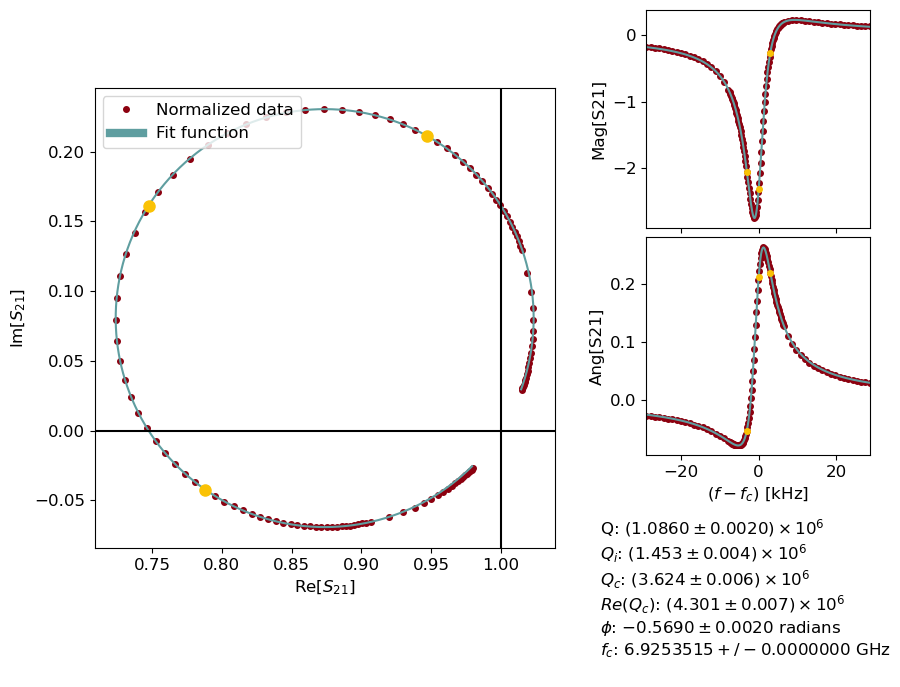

-36.020599913279625


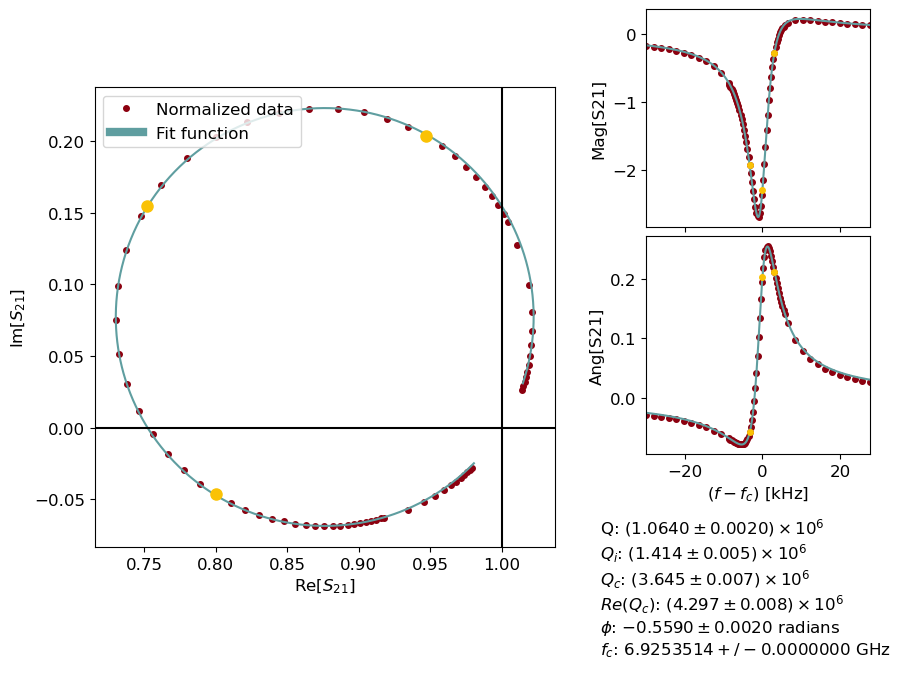

-42.04119982655925


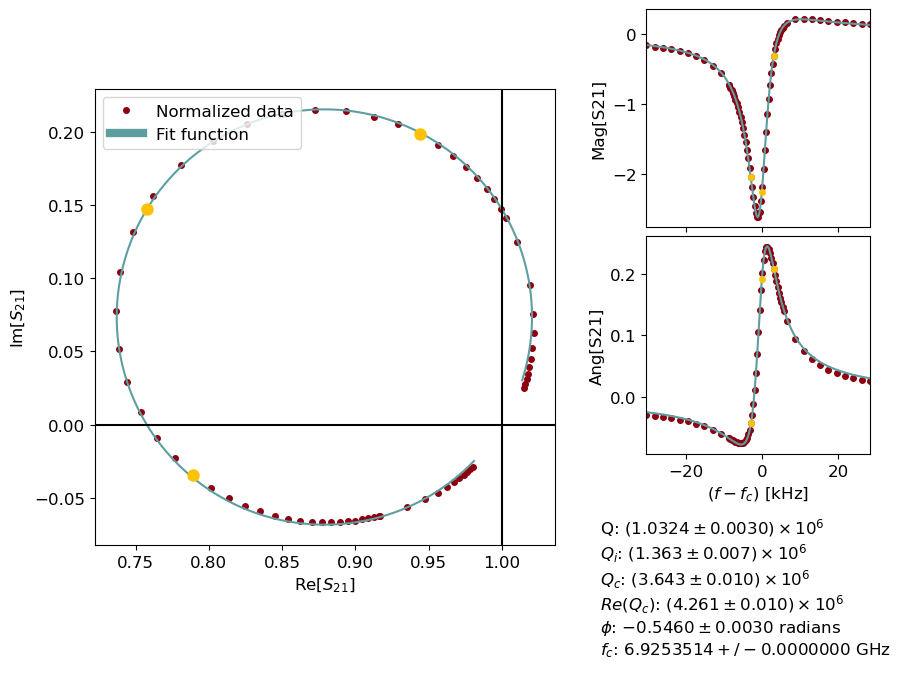

-48.061799739838875


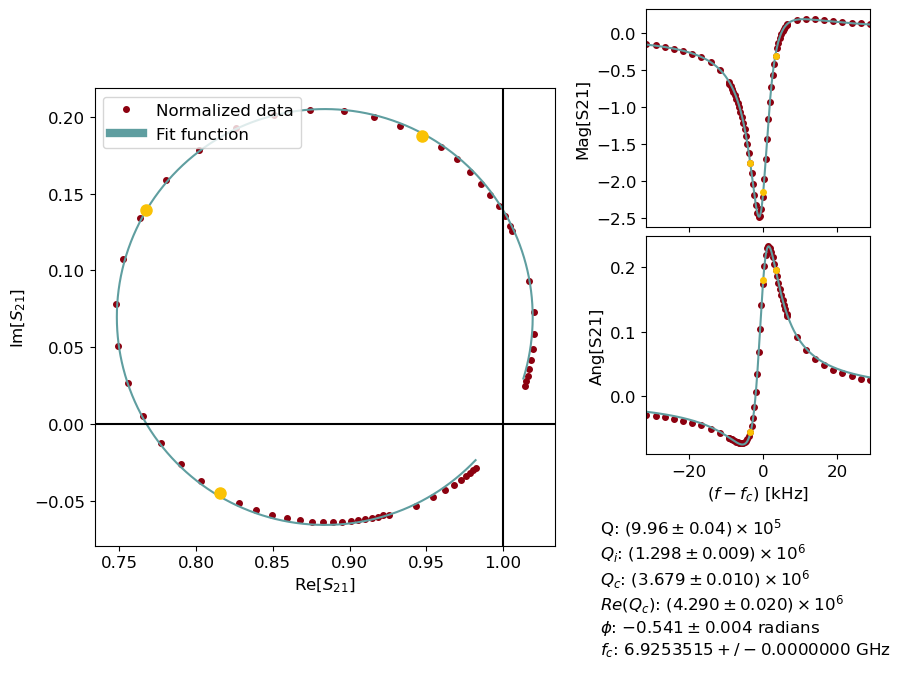

-54.0823996531185


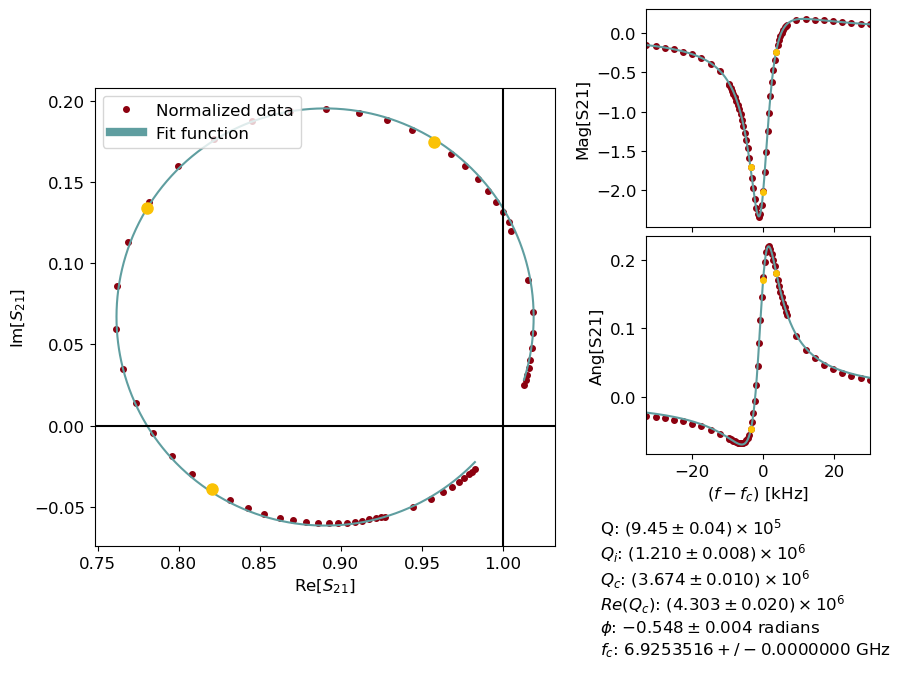

-60.102999566398125


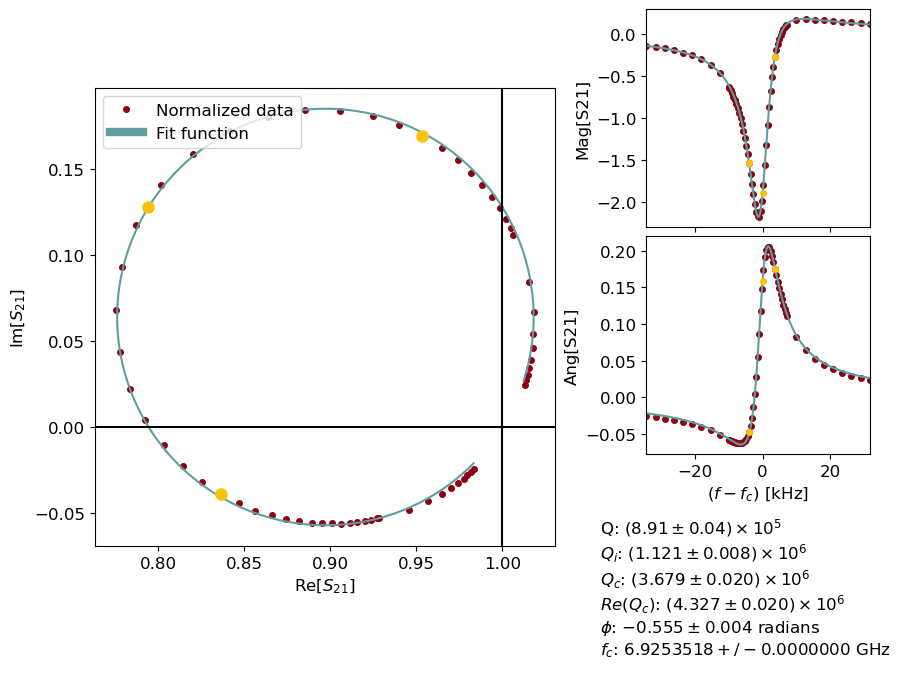

-66.12359947967775


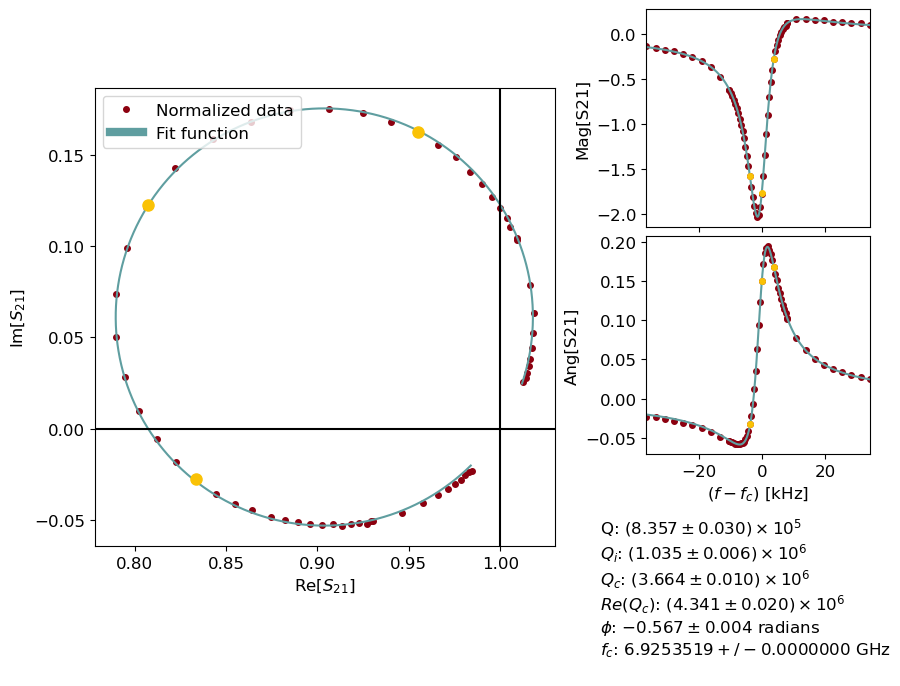

-72.14419939295738


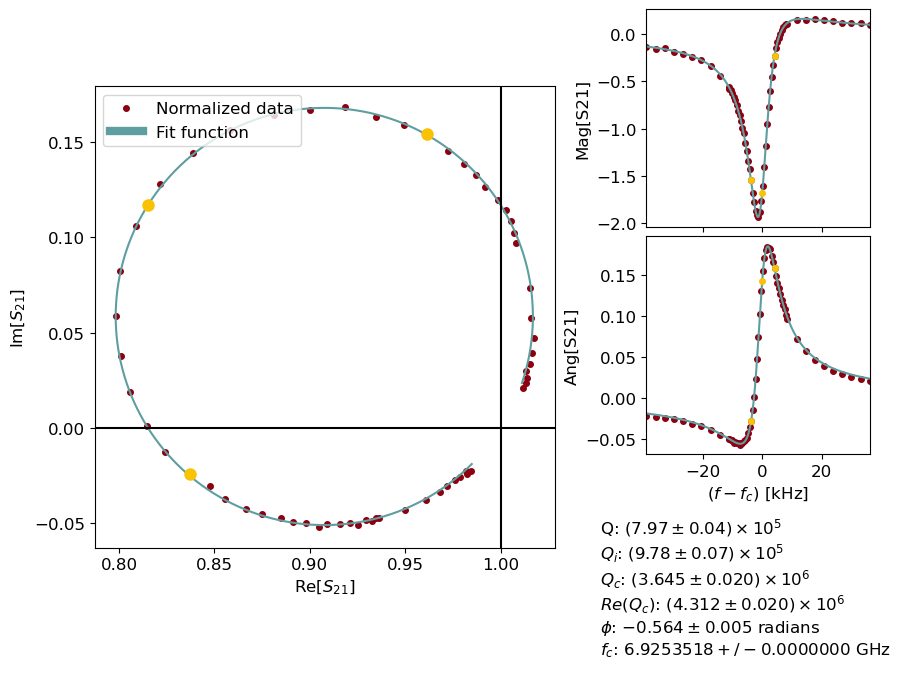

-78.164799306237


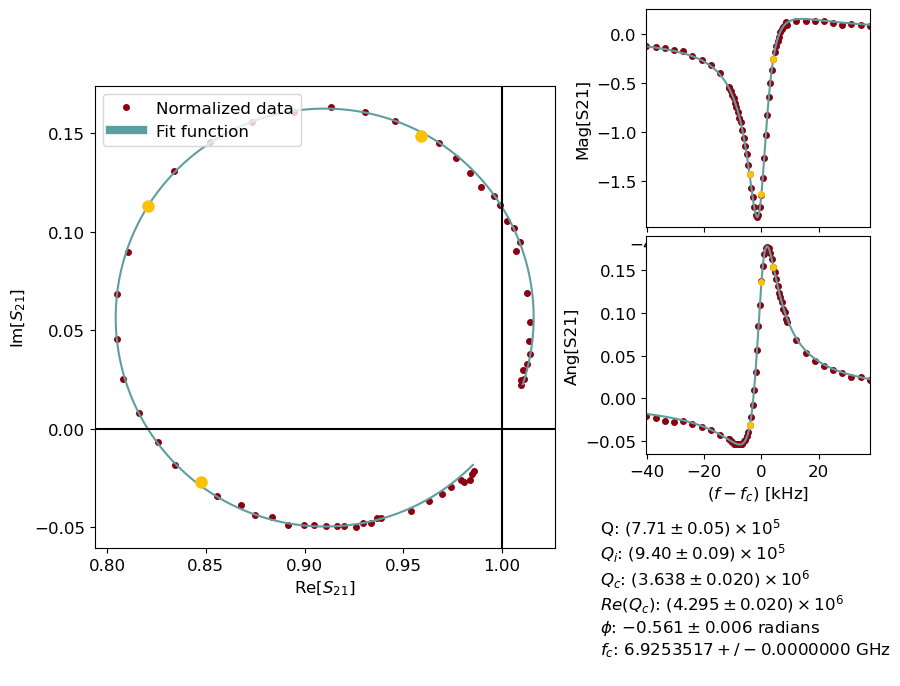

-84.18539921951663


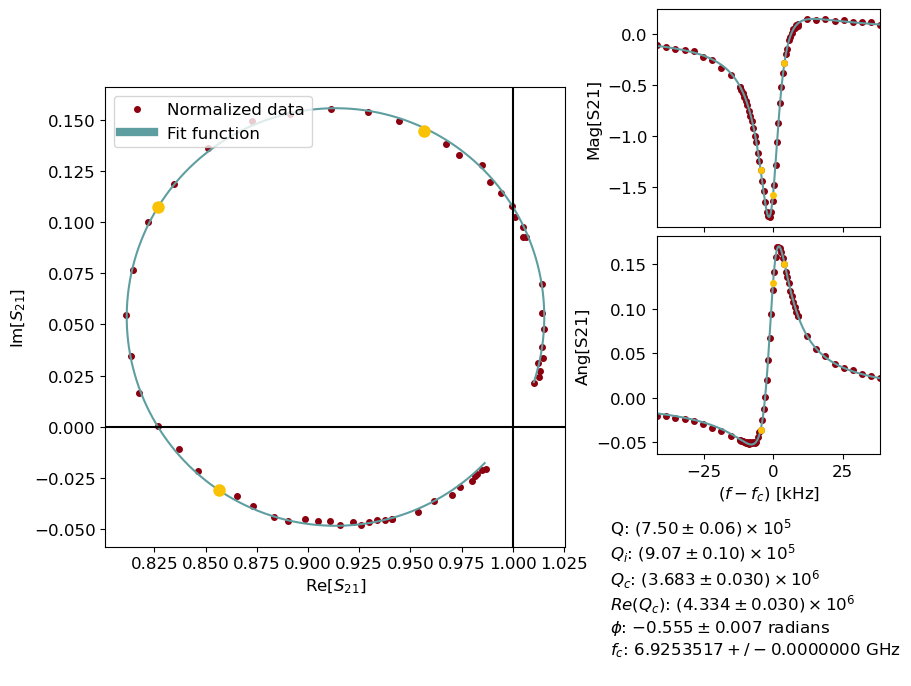

-90.20599913279625


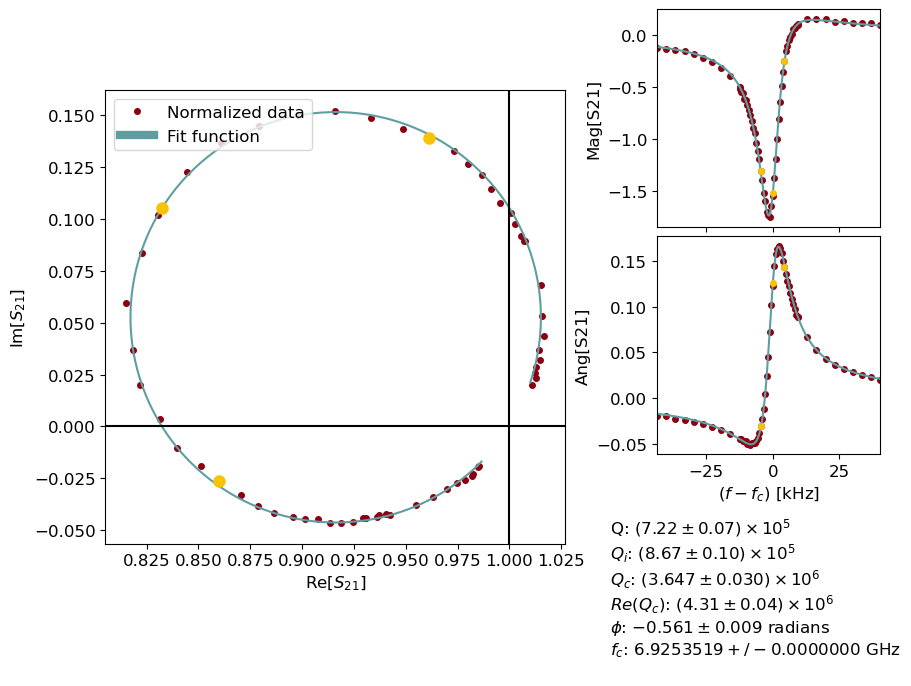

Time elapsed:  114.9866418838501
-30.0


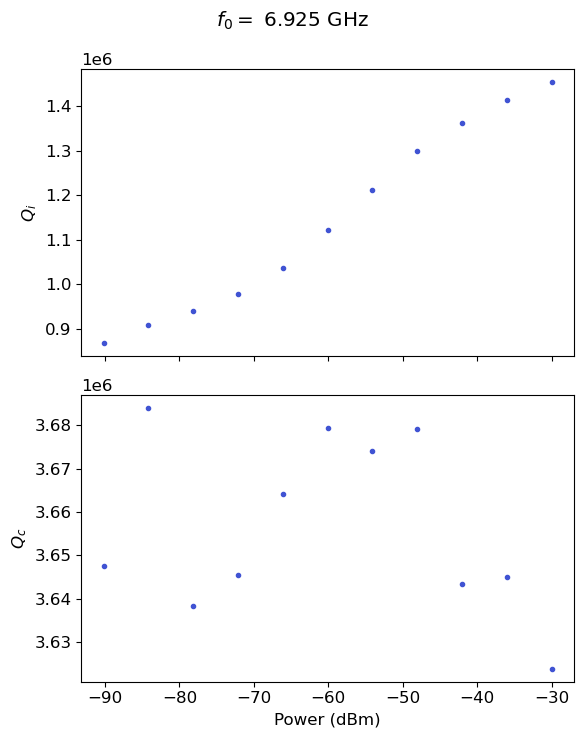

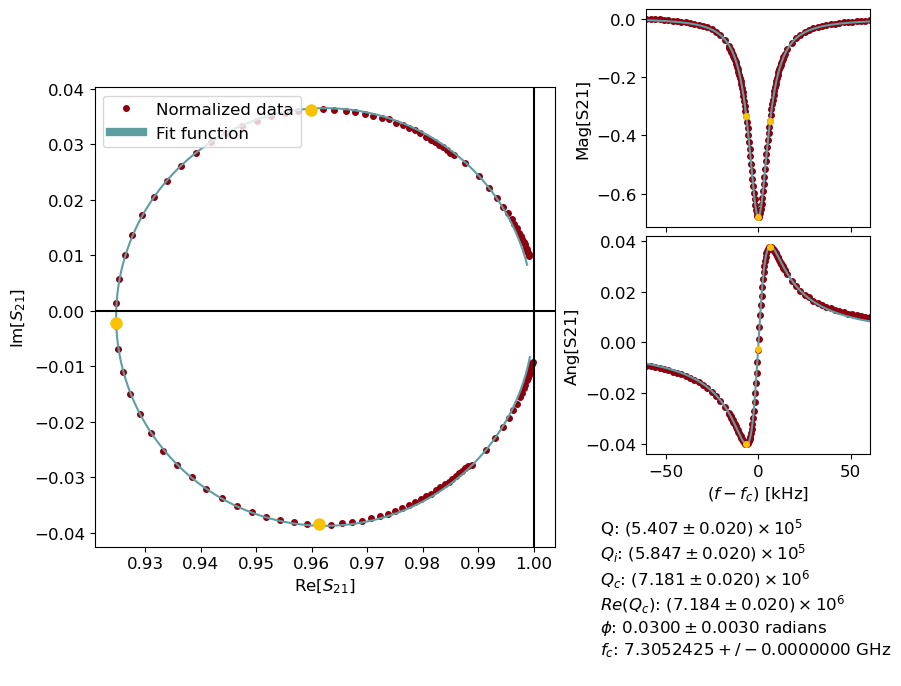

-36.020599913279625


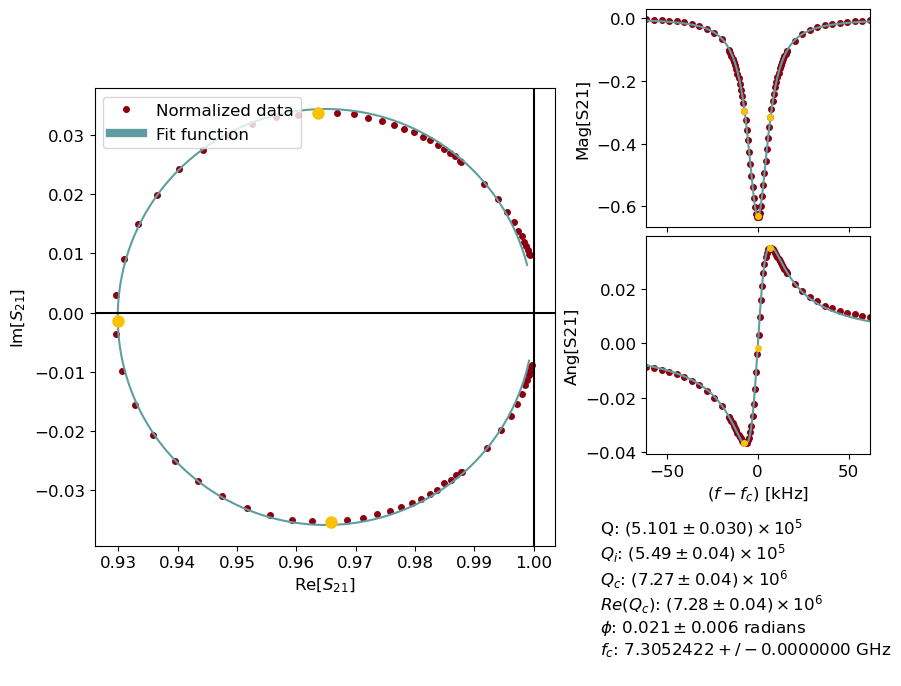

-42.04119982655925


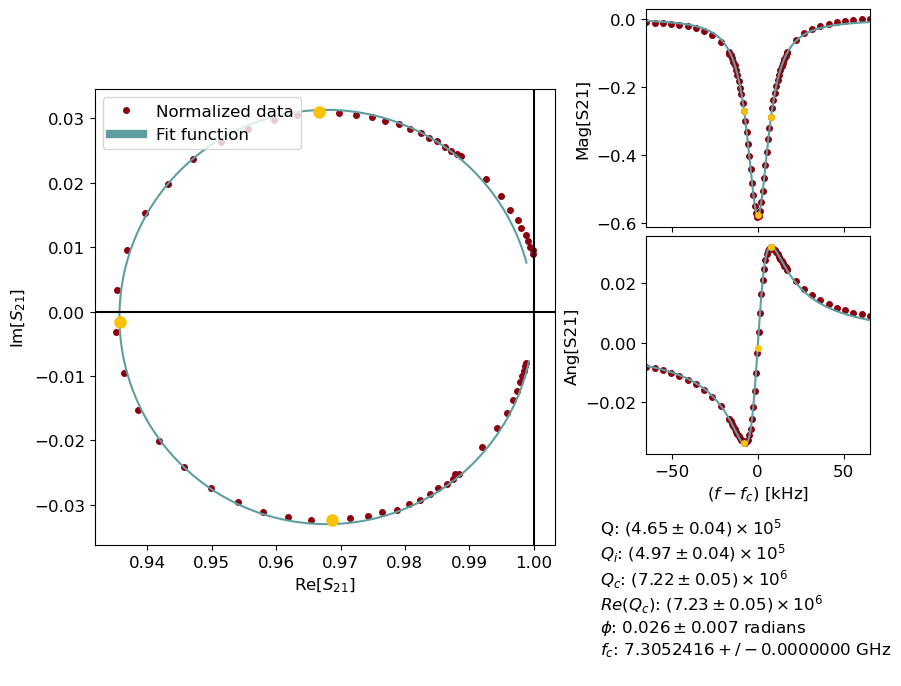

-48.061799739838875


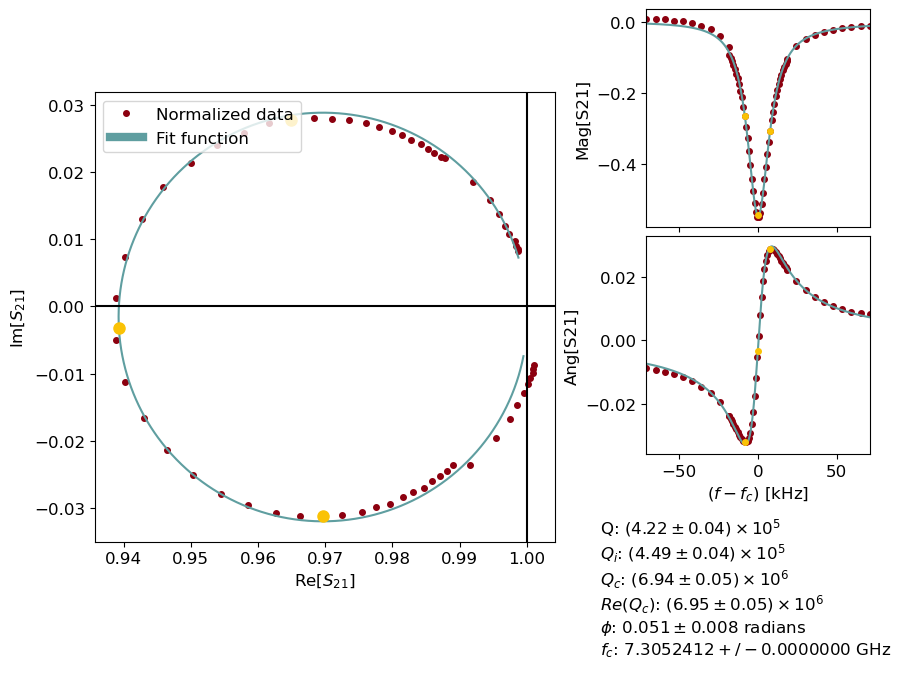

-54.0823996531185


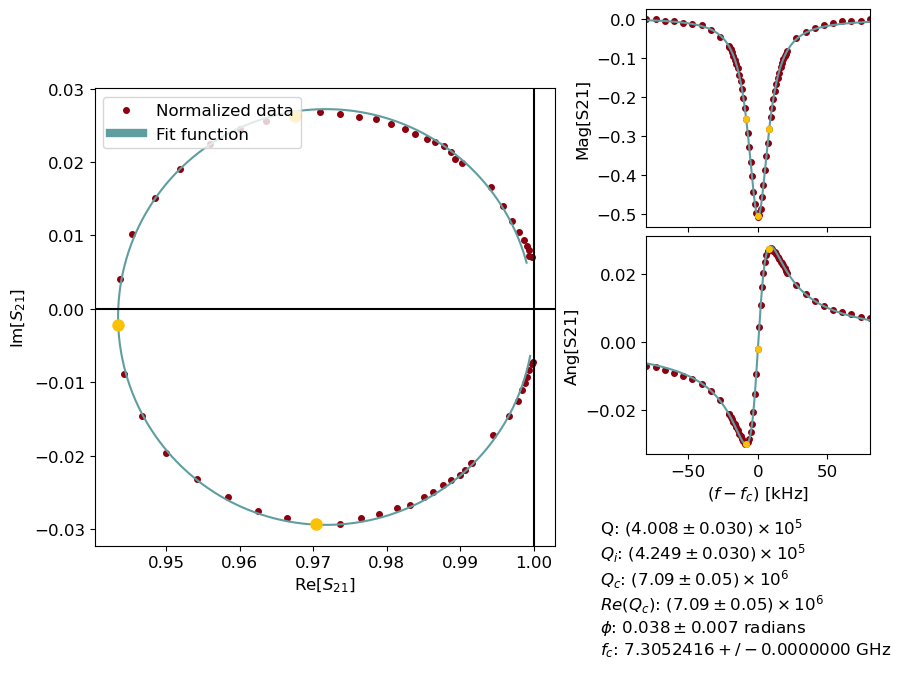

-60.102999566398125


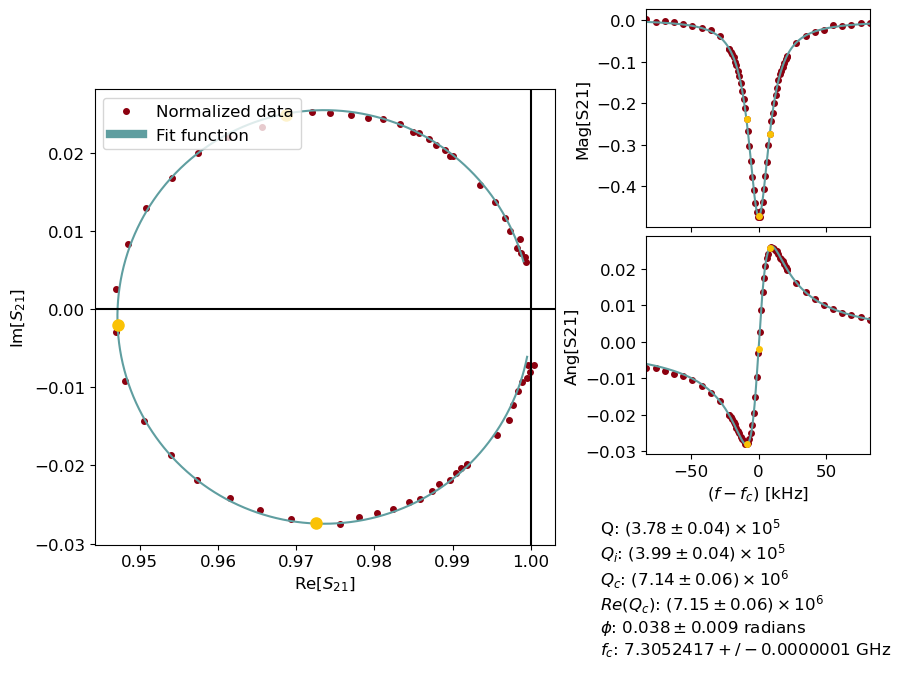

-66.12359947967775


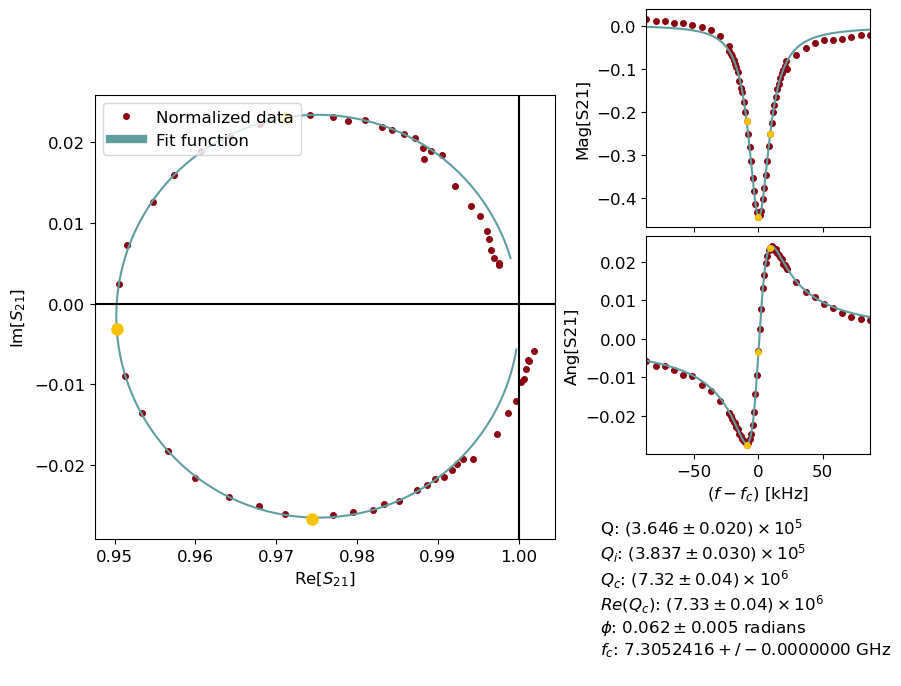

-72.14419939295738


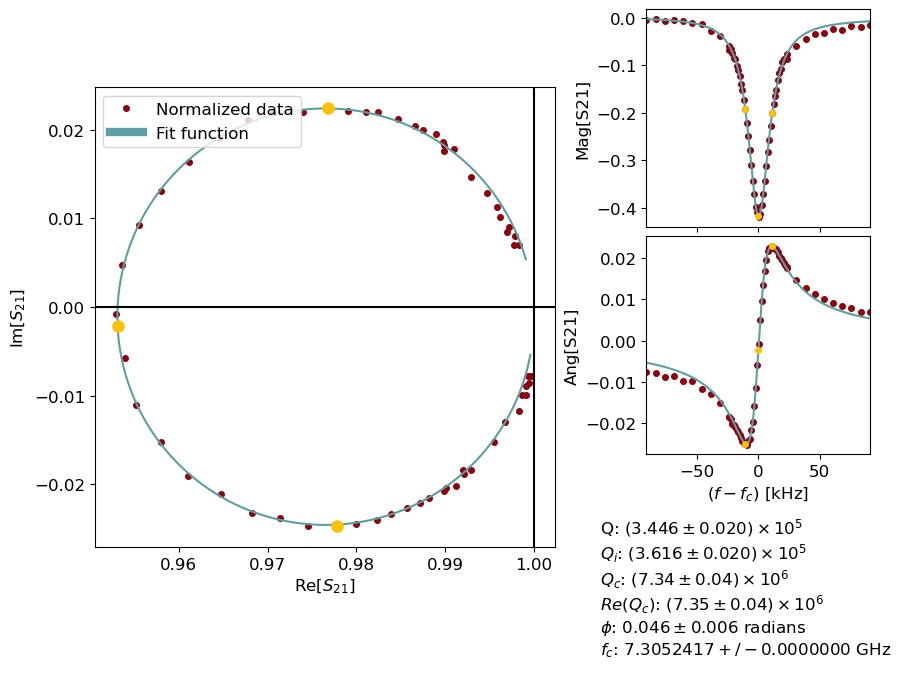

-78.164799306237


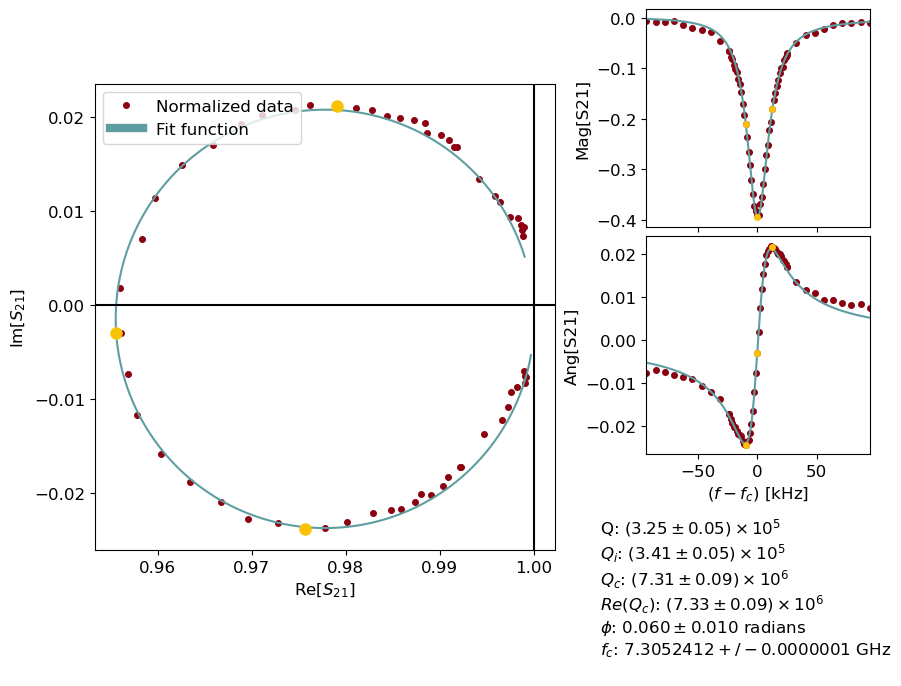

-84.18539921951663


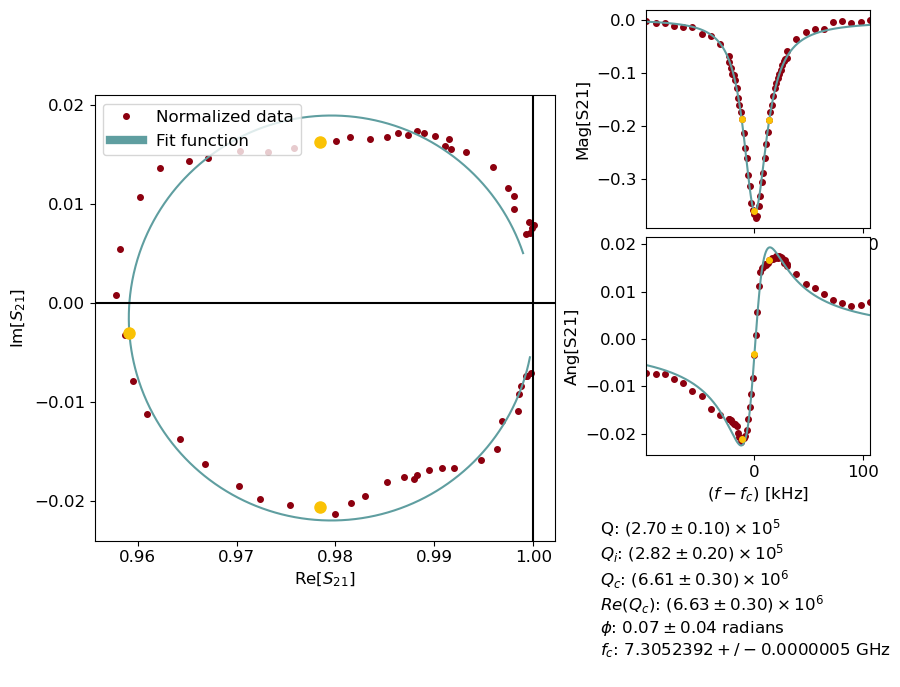

Time elapsed:  138.55454182624817


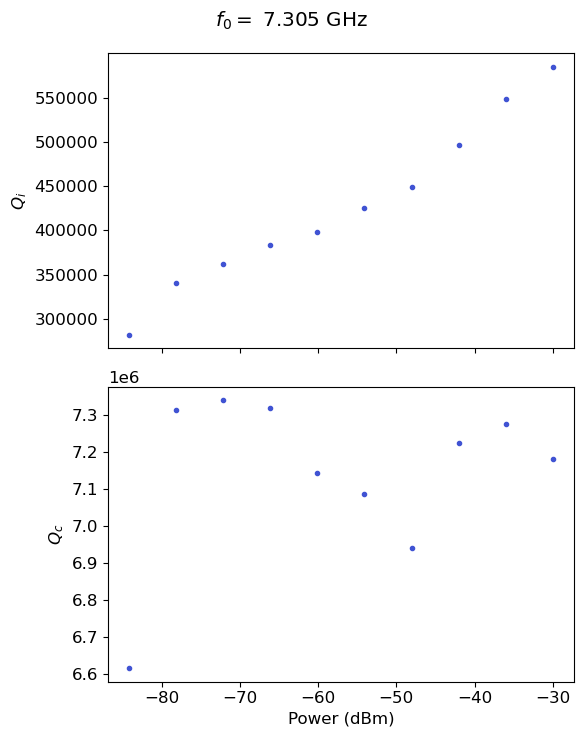

In [234]:
res_params = ana_res.analyze_sweep_gen(params['dir'][ind], data_pth, name=meas, img_pth=img_pth, plot=True, nfiles=params['nfiles'][ind], fix_freq=True, meas_type=params['meas_type'][ind], slope=slope)

Counter({69254: 11, 63575: 11, 68543: 11, 66040: 11, 62403: 11, 73052: 11, 58912: 11})
Counter({69254: 11, 63575: 11, 68543: 11, 66040: 11, 62403: 11, 73052: 11, 58912: 11})
['res_58912_32768_wideleft', 'res_58912_16384_wideleft', 'res_58912_8192_wideleft', 'res_58912_4096_wideleft', 'res_58912_2048_wideleft', 'res_58912_1024_wideleft', 'res_58912_512_wideleft', 'res_58912_256_wideleft', 'res_58912_128_wideleft', 'res_58912_64_wideleft', 'res_58912_32_wideleft']
['res_62403_32768_wideleft', 'res_62403_16384_wideleft', 'res_62403_8192_wideleft', 'res_62403_4096_wideleft', 'res_62403_2048_wideleft', 'res_62403_1024_wideleft', 'res_62403_512_wideleft', 'res_62403_256_wideleft', 'res_62403_128_wideleft', 'res_62403_64_wideleft', 'res_62403_32_wideleft']
['res_63575_32768_wideleft', 'res_63575_16384_wideleft', 'res_63575_8192_wideleft', 'res_63575_4096_wideleft', 'res_63575_2048_wideleft', 'res_63575_1024_wideleft', 'res_63575_512_wideleft', 'res_63575_256_wideleft', 'res_63575_128_wideleft

Traceback (most recent call last):
  File "/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/ana_resonator.py", line 736, in plot_all
    data, _ = load_resonator(
              ^^^^^^^^^^^^^^^
  File "/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/ana_resonator.py", line 692, in load_resonator
    data2, _ = grab_data(pth, file2, meas_type, slope)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/ana_resonator.py", line 142, in grab_data
    data, attrs = hy.prev_data(pth, fname)
                  ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sph/Library/CloudStorage

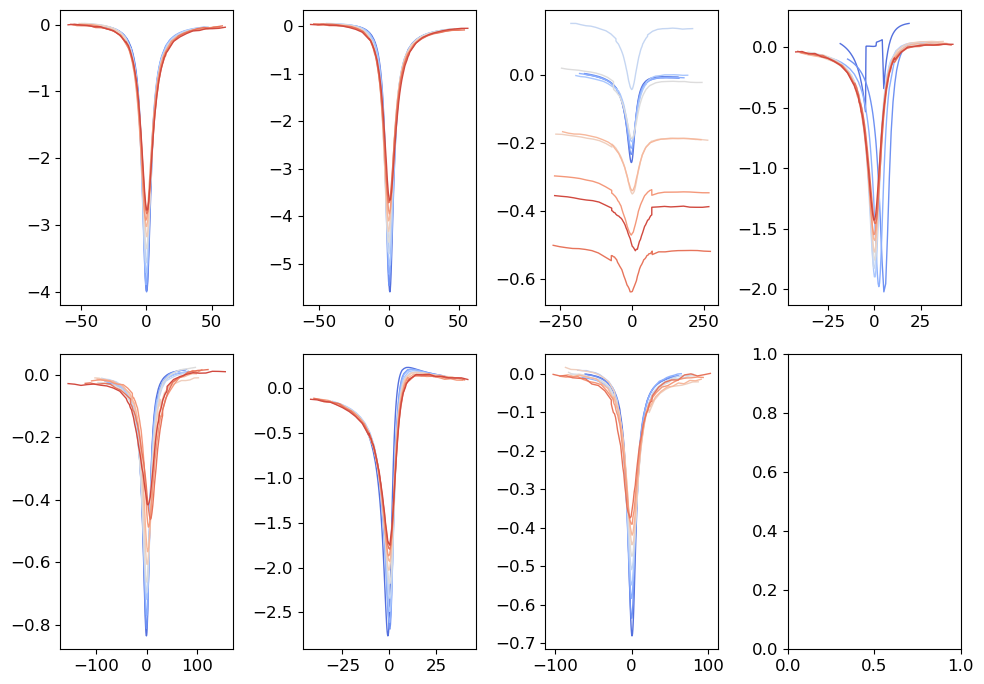

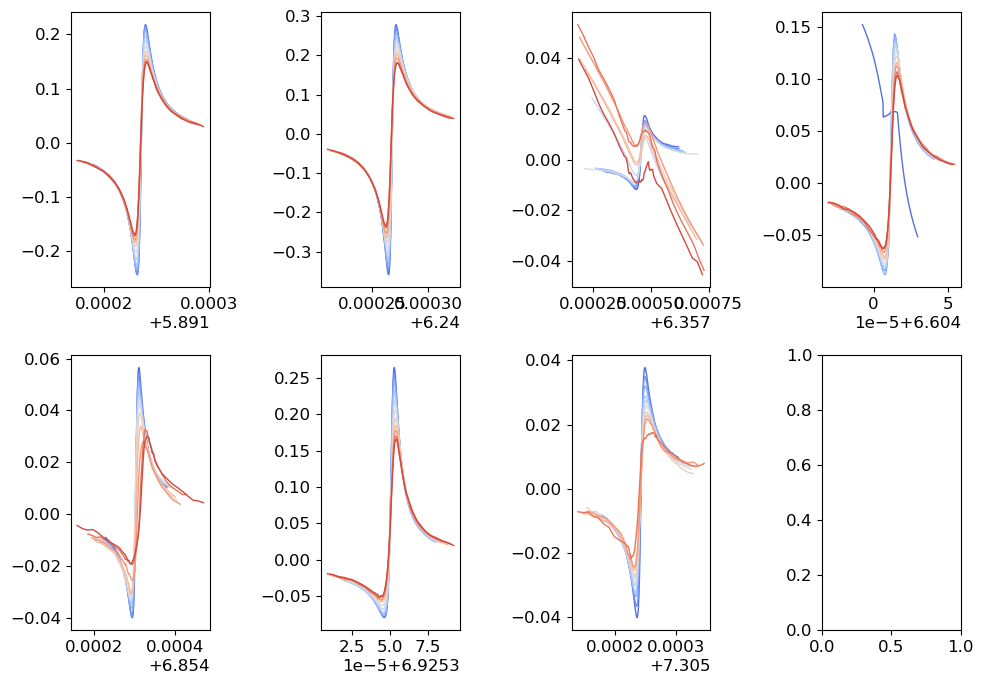

In [235]:


%matplotlib inline
frac = 7.714986
fnames = ana_res.plot_all(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, norm=True, half_norm=True, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind],slope=slope)#, slope=slope)

In [236]:
#fnames, res_params = ana_res.analyze_sweep_other(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind],slope=slope)#, slope=slope)

#### Reorder the data based on pitch (only run once)

In [237]:

if params['meas_type']=='soc':
    res_params = ana_res.convert_power(res_params) 

params, res_params=ana_res.reorder(params, res_params) # only run once!
params['qc'] = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
params['qc_err'] = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['freqs'] = np.array([np.nanmedian(res_params[i]['freqs']) for i in range(len(res_params))])
params['phs'] = np.array([np.nanmedian(res_params[i]['phs']) for i in range(len(res_params))])

### Power sweep and TLS fits

Error in plotting
Failed!
Failed!
Failed!


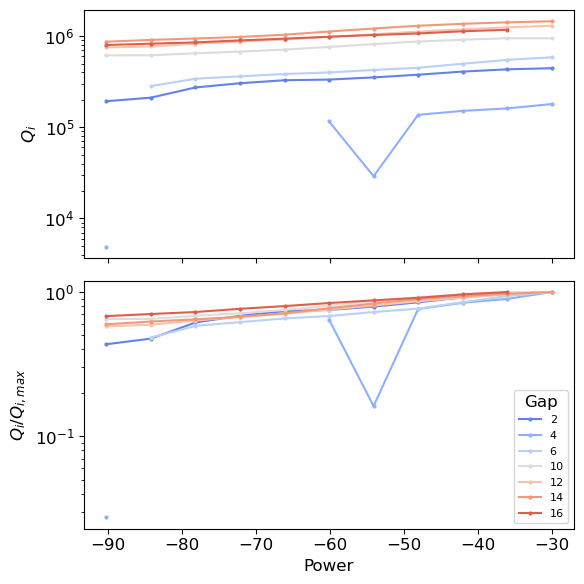

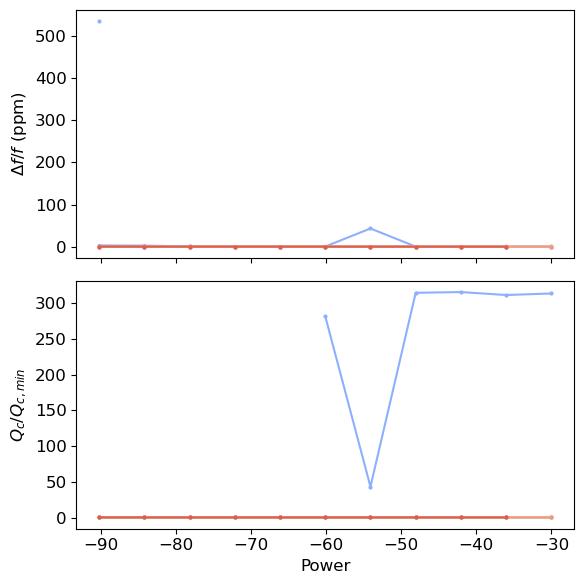

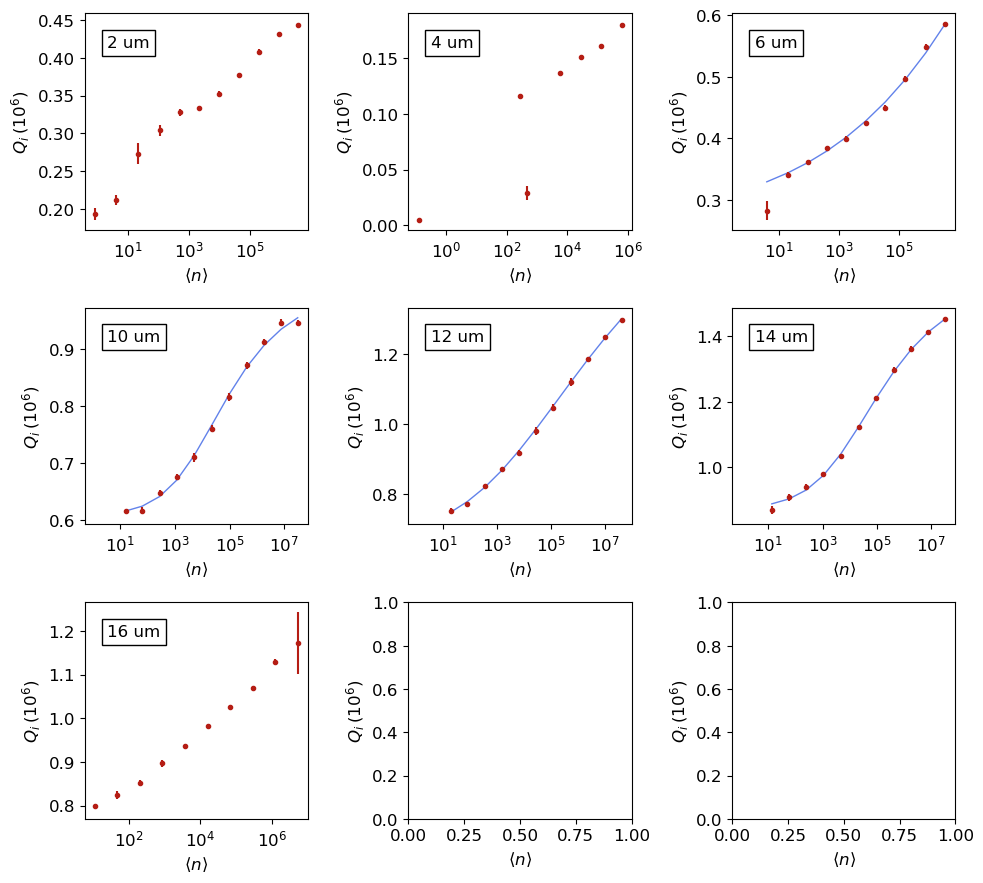

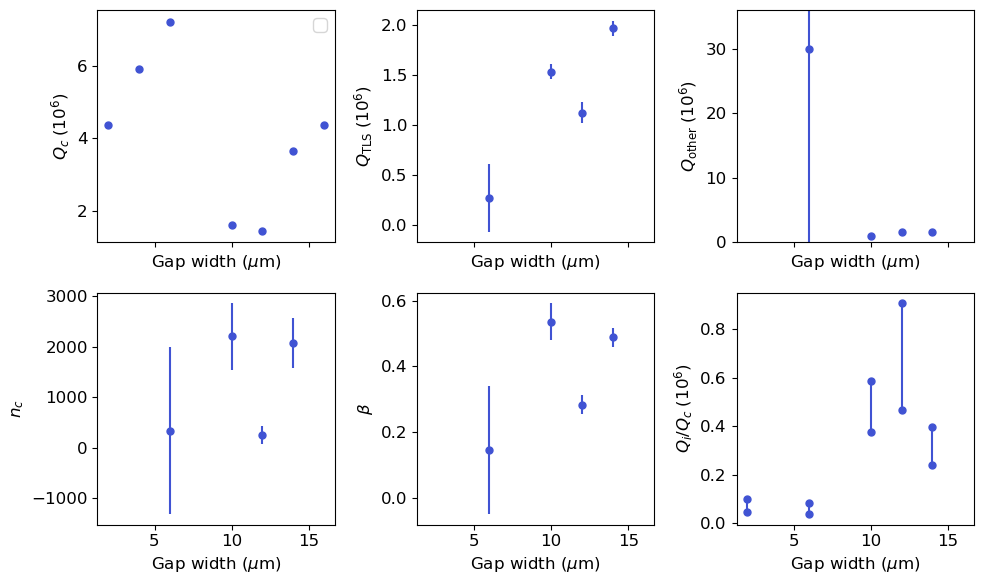

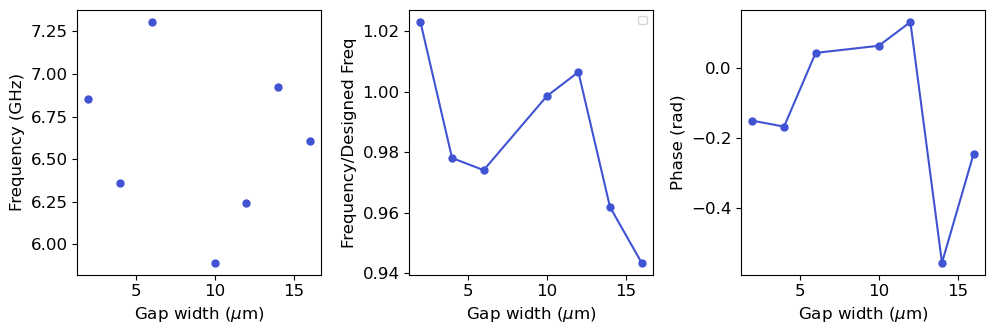

In [238]:
#%matplotlib widget
ana_res.plot_power(res_params, params, img_pth, use_pitch=True)

# min_power = [-135, -135, -100, -135, -135, -135, -100, -130]
# max_power = [24, 18, 0, 35, 37, -30, 18, 23]

min_power = [-135, -135, -100, -135, -135, -135, -100, -130]
max_power = [24, 18, 0, 35, 37, 0, 18, 23]

cfg = ana_tls.fit_qi(res_params, params, img_pth) 
#cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power, min_power_vec = min_power) 
# params['qtls0'][2] = float('nan')
# params['qother'][2] = float('nan')

ana_tls.plot_res_pars([params], [''],img_pth)
ana_res.plot_res_pars([params], [''], img_pth)
hy.save_np(params, img_pth+'Text/' + params['meas'][ind] + '.yml')


In [165]:
pitch_list = params['pitch']
qtls0 = params['qtls0']
qtls0_err = params['qtls0_err']
qother = params['qother']
qother_err = params['qother_err']

%matplotlib inline
plt.errorbar(np.array(pitch_list)+0.2, qtls0, yerr = qtls0_err, fmt='.', label = 'Q_TLS0', capsize = 2)
plt.errorbar(pitch_list, qother, yerr = qother_err, fmt='.', label = 'Q_Other', capsize = 2)
plt.xlabel('Pitch size [um]')
plt.legend()
plt.ylim(-0.2*10**6, 1.3*10**6)
plt.show()




KeyError: 'qtls0'

In [ ]:
params

{'atten': -50,
 'dir': [['powersweep3'], ['powersweep5'], ['powersweep6'], ['powersweep1']],
 'flip': True,
 'max_power': 25,
 'meas': ['silicon-no-waffle',
  'silicon-no-waffle_lopower',
  'silicon-no-waffle2',
  'silicon-waffle'],
 'meas_type': ['soc', 'soc', 'soc', 'soc'],
 'min_power': -100,
 'nfiles': [3, 3, 3, 3],
 'pitch': [2, 4, 6, 8, 10, 12, 14, 16],
 'pth': '241104-Resonator/',
 'target_freq': [7, 7.2, 7.5, 7.9, 5.9, 6.2, 6.5, 6.7],
 'temp': 0.04,
 'qc': array([5310493.0988, 3921384.2356, 4750783.911 , 1961581.7718,
        1529335.4791, 4751895.2588, 5009973.0863, 2636164.9255]),
 'qc_err': array([133694.7388, 122886.296 , 114741.6252,  31169.0051,  10620.7044,
         92095.9583, 117262.2053,  48954.572 ]),
 'freqs': array([6.6920e+09, 7.0677e+09, 7.4751e+09, 7.9884e+09, 5.9829e+09,
        6.3210e+09, 6.6800e+09, 6.9927e+09]),
 'phs': array([-0.1632, -0.3034, -0.247 ,  0.0778,  0.0714, -0.2909, -0.2266,
         0.0042]),
 'qtls0': array([         nan,   53592.228 ,  2840

### Plot with different max and min power for each resonator 

Failed!


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


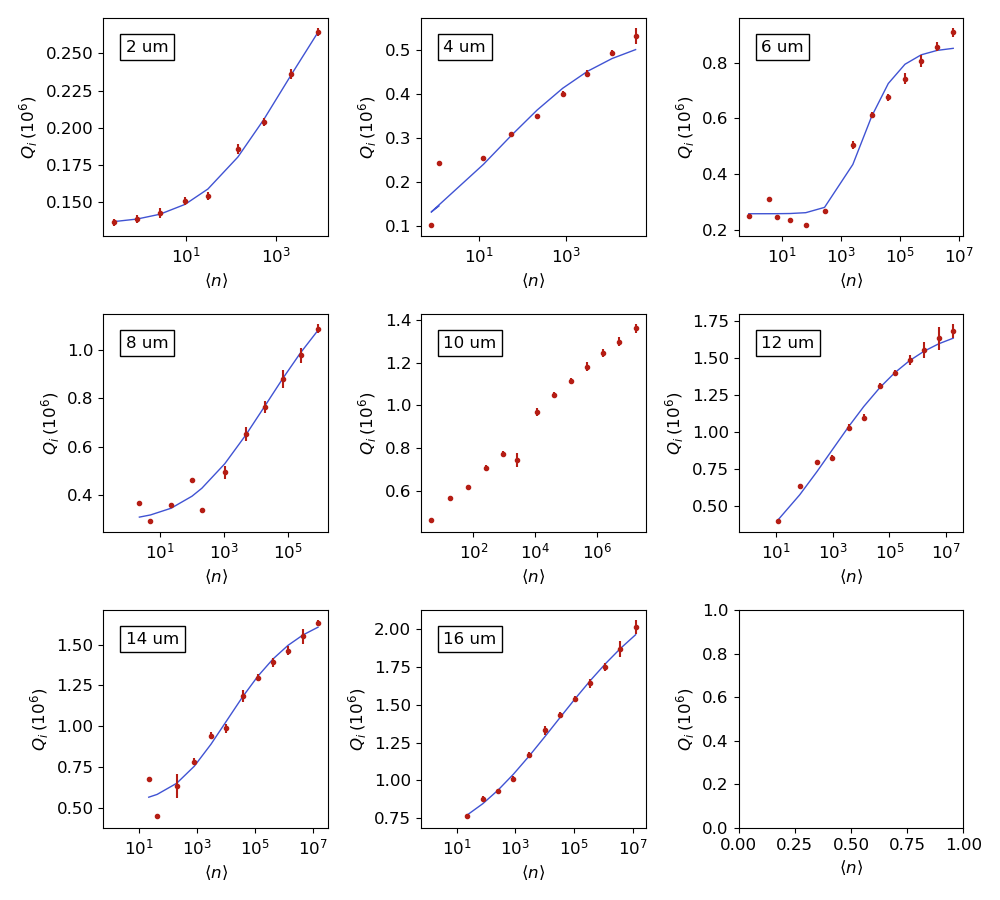

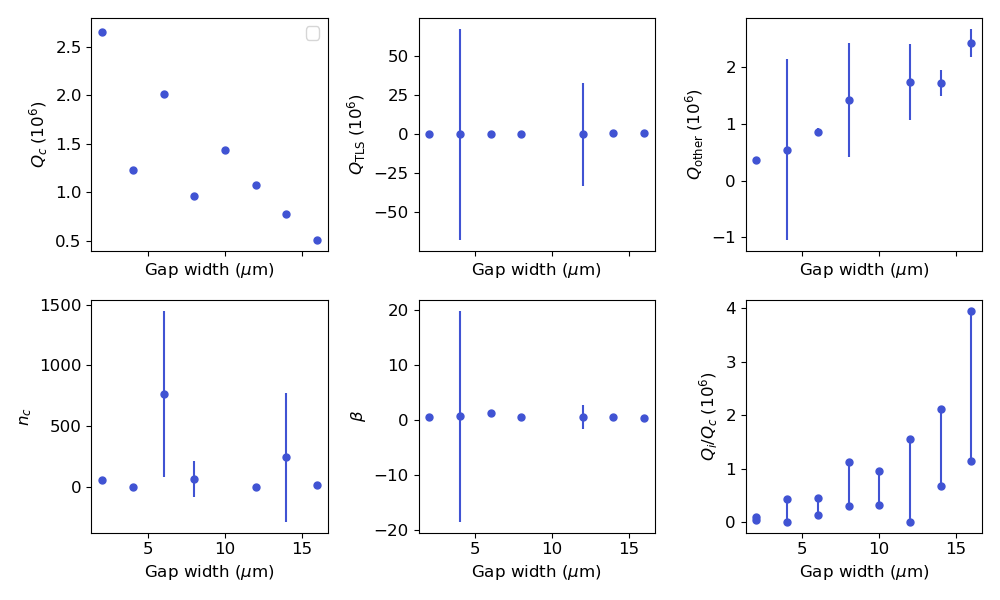

In [ ]:
if sample == 'hf3':
    max_power = [-40, -50, -35, -40, -25, -25, -25, -25]

    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    #params_nohf_low_pow = copy.deepcopy(params)
    params_hf = copy.deepcopy(params)
else:
    max_power = [-35, -35, -15, -25, -15, -15, -15, -15]
    min_power = [-115, -115, -115, -115, -100, -95, -90, -90]
    
    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power, min_power_vec = min_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    params_no_hf = copy.deepcopy(params)

### Print out info for running scans

In [ ]:
lw=[]
freq =[]
print('linewidth')
for i in range(len(params['freqs'])):
    q = 1/(1/params['qi0'][i]+1/params['qc'][i])
    lw.append(params['freqs'][i]/q)
    freq.append(params['freqs'][i])

print(lw)
print(freq)

linewidth
[62108.84999872619, 31754.88651060028, 35928.47570952304, 29346.31301041099, 14571.561073889929, 14732.344817108129, 17533.865679245962, 19348.403941294877]
[6336553046.740015, 6692450581.395647, 7056426236.336695, 7382931608.965666, 5516761886.202525, 5820846804.326765, 6091775267.869023, 6376982672.309232]


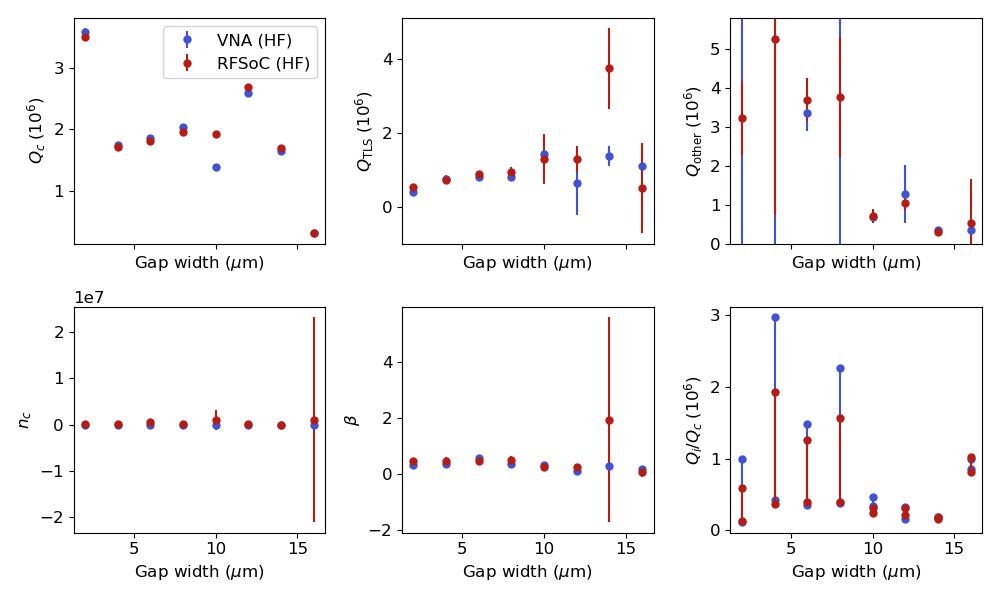

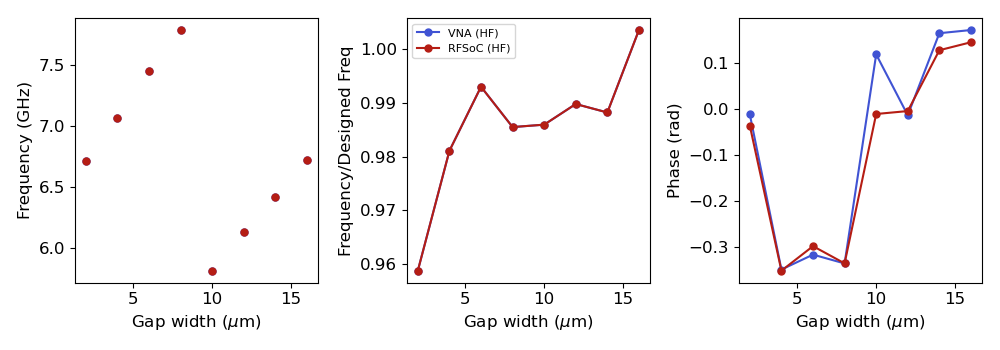

In [ ]:
%matplotlib widget
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 

#pnames = ['240729-2', '240729-3']
pnames = ['240729-3', '240820_soc']
labs = ['VNA (HF)', 'RFSoC (HF)'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ana_tls.plot_res_pars(plist, labs,img_pth)
ana_res.plot_res_pars(plist, labs,img_pth)


## Single resonators

### Get list of resonators

In [ ]:
# Grab list of resonators following corect format in directory. 

pattern0 = r'res_(\d+)_\d{2,5}dbm'
resonators, file_list0 = ana_res.get_resonators(directories[0],pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[0]) + '(\d{2,3})dbm'
file_list = ana_res.get_resonator_power_list(pattern, file_list0)

### Fit slope for RFSoC phase correction

In [ ]:
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240816-Resonator'

plt.figure()
data, attrs = hy.prev_data(pth, 'test2')
plt.plot(data['xpts'][0], data['phases'][0])
slope, ofs = np.polyfit(data['xpts'][0], np.unwrap(data['phases'][0]), 1)
data['phases'] = np.unwrap(data['phases'][0]) - slope * data['xpts'][0]-ofs

print(slope)

data['phases']

In [ ]:
# Grab list of resonators following corect format in directory. 

pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240818-Resonator/'

#directories = ['240816-Resonator/powersweep3']
directories = ['powersweep2']
pattern0 = r'res_(\d+)_\d'
resonators, file_list = ana_res.get_resonators(directories[0],pth, pattern0)

In [ ]:
fname =  'res_6423_4096_wideright'
data, attrs = hy.prev_data(pth+directories[0], fname)

data.keys()

Single resonator

In [ ]:
data = ana_res.grab_data(pth+directories[0], file_list[4], 'soc', slope=slope)
#ana_res.plot_raw_data(data)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   

In [ ]:
sorted_file_list = sorted(file_list)
print(sorted_file_list)

In [ ]:
file_list[12]

In [ ]:
%matplotlib widget

for i in range(len(file_list)):
    #try:
    data = ana_res.grab_data(pth+directories[0], file_list[i])       
    ana_res.plot_raw_data(data)
    #output = ana_res.fit_resonator(data, file_list[i], output_path, 'png')    
    #except: 
    #    print('fit failed')  
7.714986

In [ ]:

pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data = ana_res.grab_data(pth, fname)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   
ana_res.plot_raw_data(data)

## Temp sweep

In [ ]:
# Initialize the directories list for a temperature sweep 
temps, directories = ana_res.get_temp_list(pth_base, max_temp=1500)
res_params = ana_res.analyze_sweep(directories)

ana_res.plot_power_temp(res_params,i,params,img_pth)